## Objective

In this project, the objective is to answer the following questions:

Part 1:
* How to download any stock prices to work on
* How to compute buy sell signals on the stock
* How to measure portfolio performance from profit and loss based on buy and sell signals on the stock

Part 2: 
* How to choose parameters to optimize profits, and explore different trading strategies
* How to apply computational intelligent methods to choose parameters of trading strategies on training data set, then apply to test data set
* How to benchmark the portfolio performance of  computational intelligent methods

Part 3: 
* How to apply computational intelligent methods to measure the performance of the prediction
* How to train an initial model then perform transfer learning onto another dataset
* How to interpret and explain the computational intelligent method in predicting the stock prices
* How to apply the stock price prediction to help increase profits, and benchmark the portfolio performance with and without prediction



## Reference

Ang, K. K., & Quek, C. (2006). Stock Trading Using RSPOP: A Novel Rough Set-Based Neuro-Fuzzy Approach. IEEE Trans. Neural Netw., 17(5), 1301-1315. doi:http://dx.doi.org/10.1109/TNN.2006.875996

# Best Models

The best models that have been obtained are attached in this folder. If running evaluation, its best to use these models.
https://drive.google.com/drive/folders/1znlYEhYNO2eGLM4JgjiTvfZP2UilQ7A7?usp=share_link

## Introduction

First we install the yahoo finance library

This library is used to download stock prices into pandas data frame. Run the yml file for creating the conda environment to install libraries required.

Then we import the necessary libraries

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
import sys
import math
import numpy as np
import pandas as pd
from math import sqrt
import yfinance as yf
import random
from random import seed, randrange
import fuzzylab as fz
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from yahoofinancials import YahooFinancials
%matplotlib inline
import mpld3

from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, Subset

mpld3.enable_notebook()

# 1. Stock prices

Pick a Singapore trust stock price to download. We have picked up stock prices for AutoDesk and Nvidia

In [68]:
stock_df = yf.download('ADSK')
stock_df.head()

[*********************100%***********************]  1 of 1 completed


Price                     Adj Close     Close      High       Low      Open  \
Ticker                         ADSK      ADSK      ADSK      ADSK      ADSK   
Date                                                                          
1985-06-28 00:00:00+00:00  0.444327  0.500000  0.510417  0.500000  0.000000   
1985-07-01 00:00:00+00:00  0.444327  0.500000  0.510417  0.500000  0.500000   
1985-07-02 00:00:00+00:00  0.462841  0.520833  0.531250  0.520833  0.520833   
1985-07-03 00:00:00+00:00  0.462841  0.520833  0.531250  0.520833  0.520833   
1985-07-05 00:00:00+00:00  0.472098  0.531250  0.541667  0.531250  0.531250   

Price                        Volume  
Ticker                         ADSK  
Date                                 
1985-06-28 00:00:00+00:00  14728800  
1985-07-01 00:00:00+00:00   6511200  
1985-07-02 00:00:00+00:00   2380800  
1985-07-03 00:00:00+00:00   1317600  
1985-07-05 00:00:00+00:00   1128000

Alternatively, you can also use the ticker function to download the stock price. Ticker also allows you to download additional data. After you downloaded the stock price, you can also plot the data.

<Axes: title={'center': 'Auto Desk price'}, xlabel='Date'>

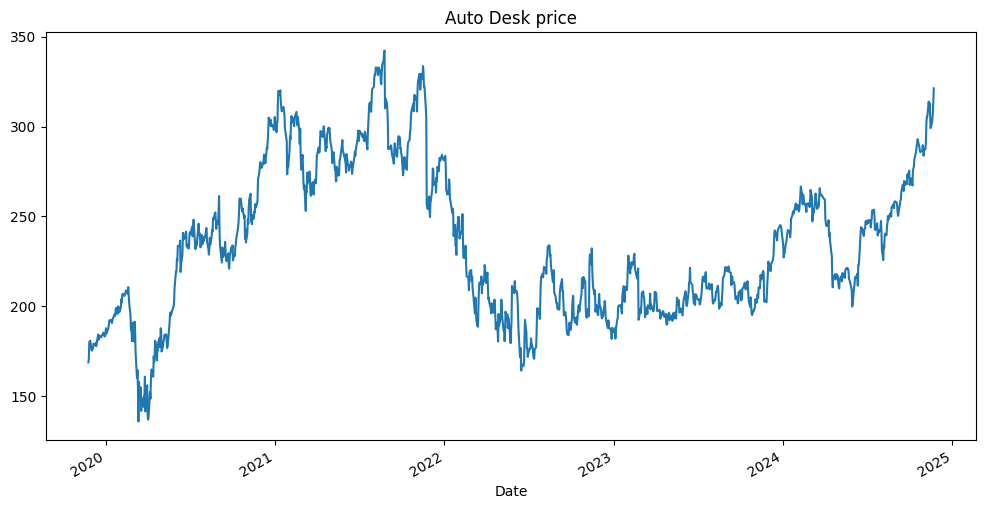

In [69]:
ticker = yf.Ticker('ADSK')
stock_df = ticker.history(period="5y")
figure(figsize=(12, 6))
stock_df['Close'].plot(title="Auto Desk price")

In [70]:
stock_df.head()

Open        High         Low       Close  \
Date                                                                        
2019-11-25 00:00:00-05:00  168.000000  169.289993  167.669998  168.880005   
2019-11-26 00:00:00-05:00  169.789993  172.000000  168.699997  170.800003   
2019-11-27 00:00:00-05:00  170.529999  180.619995  169.699997  180.179993   
2019-11-29 00:00:00-05:00  178.500000  181.360001  176.649994  180.899994   
2019-12-02 00:00:00-05:00  180.690002  181.190002  175.070007  175.630005   

                            Volume  Dividends  Stock Splits  
Date                                                         
2019-11-25 00:00:00-05:00  1573300        0.0           0.0  
2019-11-26 00:00:00-05:00  3420200        0.0           0.0  
2019-11-27 00:00:00-05:00  4433900        0.0           0.0  
2019-11-29 00:00:00-05:00  1472300        0.0           0.0  
2019-12-02 00:00:00-05:00  1886800        0.0           0.0

In [71]:
# Extract data from date 1st October 2022 to 30th September 2024

# Convert the index to datetime objects
stock_df.index = pd.to_datetime(stock_df.index)

# Filter the data for the specified date range
start_date = '2022-10-01'
end_date = '2024-09-30'
filtered_stock_df = stock_df[(stock_df.index >= start_date) & (stock_df.index <= end_date)]

filtered_stock_df

Open        High         Low       Close  \
Date                                                                        
2022-10-03 00:00:00-04:00  187.830002  193.440002  187.619995  192.460007   
2022-10-04 00:00:00-04:00  197.669998  200.240005  197.300003  199.990005   
2022-10-05 00:00:00-04:00  196.139999  205.179993  194.779999  204.529999   
2022-10-06 00:00:00-04:00  203.809998  209.639999  203.369995  205.869995   
2022-10-07 00:00:00-04:00  201.589996  202.169998  193.270004  194.740005   
...                               ...         ...         ...         ...   
2024-09-24 00:00:00-04:00  267.940002  270.119995  266.619995  269.649994   
2024-09-25 00:00:00-04:00  268.950012  270.739990  267.570007  268.000000   
2024-09-26 00:00:00-04:00  271.130005  273.489990  269.730011  273.359985   
2024-09-27 00:00:00-04:00  273.359985  274.500000  271.000000  271.899994   
2024-09-30 00:00:00-04:00  274.839996  275.850006  272.059998  275.480011   

                            Volume  Dividends  Stock Splits  
Date                                                         
2022-10-03 00:00:00-04:00  1628600        0.0           0.0  
2022-10-04 00:00:00-04:00  2117900        0.0           0.0  
2022-10-05 00:00:00-04:00  1995900        0.0           0.0  
2022-10-06 00:00:00-04:00  1791600        0.0           0.0  
2022-10-07 00:00:00-04:00  1261200        0.0           0.0  
...                            ...        ...           ...  
2024-09-24 00:00:00-04:00  1189000        0.0           0.0  
2024-09-25 00:00:00-04:00  1174500        0.0           0.0  
2024-09-26 00:00:00-04:00  1108000        0.0           0.0  
2024-09-27 00:00:00-04:00   614900        0.0           0.0  
2024-09-30 00:00:00-04:00  1109600        0.0           0.0  

[501 rows x 7 columns]

# 2. Computing trade signals

There are different types of moving averages, such as simple moving average, weighted moving average or exponential moving average. The
difference between the types is how the average is computed based on the weight assigned to data points. Simple moving average can be computed by simply taking the mean of the data points. The period to compute the moving average is a parameter. You can have a 200 days simple moving average, a 5 days simple moving average etc.

We have computed a fast 10 days and slow 200 days moving average on the close price.

**We have heuristcally determined rolling windows as 10 and 200 through trial and error**

In [72]:
df=filtered_stock_df
# create 20 days simple moving average column
df['Fast_SMA'] = df['Close'].rolling(window = 10, min_periods = 1).mean()
# create 100 days simple moving average column
df['Slow_SMA'] = df['Close'].rolling(window = 200, min_periods = 1).mean()
# display first few rows
df.head()

Open        High         Low       Close  \
Date                                                                        
2022-10-03 00:00:00-04:00  187.830002  193.440002  187.619995  192.460007   
2022-10-04 00:00:00-04:00  197.669998  200.240005  197.300003  199.990005   
2022-10-05 00:00:00-04:00  196.139999  205.179993  194.779999  204.529999   
2022-10-06 00:00:00-04:00  203.809998  209.639999  203.369995  205.869995   
2022-10-07 00:00:00-04:00  201.589996  202.169998  193.270004  194.740005   

                            Volume  Dividends  Stock Splits    Fast_SMA  \
Date                                                                      
2022-10-03 00:00:00-04:00  1628600        0.0           0.0  192.460007   
2022-10-04 00:00:00-04:00  2117900        0.0           0.0  196.225006   
2022-10-05 00:00:00-04:00  1995900        0.0           0.0  198.993337   
2022-10-06 00:00:00-04:00  1791600        0.0           0.0  200.712502   
2022-10-07 00:00:00-04:00  1261200        0.0           0.0  199.518002   

                             Slow_SMA  
Date                                   
2022-10-03 00:00:00-04:00  192.460007  
2022-10-04 00:00:00-04:00  196.225006  
2022-10-05 00:00:00-04:00  198.993337  
2022-10-06 00:00:00-04:00  200.712502  
2022-10-07 00:00:00-04:00  199.518002

There many moving average strategies that can be developed to generate trade signals. here we will use a simple moving average crossover strategy based on the SMAs we computed. A moving average can be use to indicate price trends. A crossover occurs when a faster or shorter moving average, such as the 10 days SMA crosses a slower or longer moving average, such as the 200 days SMA. This crossover  point can be used as a  indicator to buy or sell a stock.

First we create a new column ‘Signal’ such that if Fast_SMA is greater than Slow_SMA then set to 1 else set to 0.


In [73]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['Fast_SMA'] > df['Slow_SMA'], 1.0, 0.0)

We now need to generate the buy and sell from the ‘Signal’ values. Crossover happens when the Fast_SMA and the Slow_SMA cross,  the ‘Signal’ changes from 0 to 1, or from 1 to 0. Thus we can just create a ‘Position’ value to indicate a day-to-day difference of the ‘Signal’ column.

‘Position’ = 1 implies that Signal changed from 0 to 1, meaning a faster moving average has crossed a slower moving average. This indicates a bull or up trend in the price and thus this is a buy signal.

‘Position’ = -1 implies that  Signal changed from 1 to 0, meaning a faster moving average has crossed below a slower moving average. This indicates a bear or down trend in the price and thus this is a sell signal.

In [74]:
df['Position'] = df['Signal'].diff()
# Set the first row of Position to 0. Otherwise it is nan from diff function.
df['Position'].iloc[0]=0
# display first few rows
df.head()


Open        High         Low       Close  \
Date                                                                        
2022-10-03 00:00:00-04:00  187.830002  193.440002  187.619995  192.460007   
2022-10-04 00:00:00-04:00  197.669998  200.240005  197.300003  199.990005   
2022-10-05 00:00:00-04:00  196.139999  205.179993  194.779999  204.529999   
2022-10-06 00:00:00-04:00  203.809998  209.639999  203.369995  205.869995   
2022-10-07 00:00:00-04:00  201.589996  202.169998  193.270004  194.740005   

                            Volume  Dividends  Stock Splits    Fast_SMA  \
Date                                                                      
2022-10-03 00:00:00-04:00  1628600        0.0           0.0  192.460007   
2022-10-04 00:00:00-04:00  2117900        0.0           0.0  196.225006   
2022-10-05 00:00:00-04:00  1995900        0.0           0.0  198.993337   
2022-10-06 00:00:00-04:00  1791600        0.0           0.0  200.712502   
2022-10-07 00:00:00-04:00  1261200        0.0           0.0  199.518002   

                             Slow_SMA  Signal  Position  
Date                                                     
2022-10-03 00:00:00-04:00  192.460007     0.0       0.0  
2022-10-04 00:00:00-04:00  196.225006     0.0       0.0  
2022-10-05 00:00:00-04:00  198.993337     0.0       0.0  
2022-10-06 00:00:00-04:00  200.712502     0.0       0.0  
2022-10-07 00:00:00-04:00  199.518002     0.0       0.0

<Axes: xlabel='Date'>

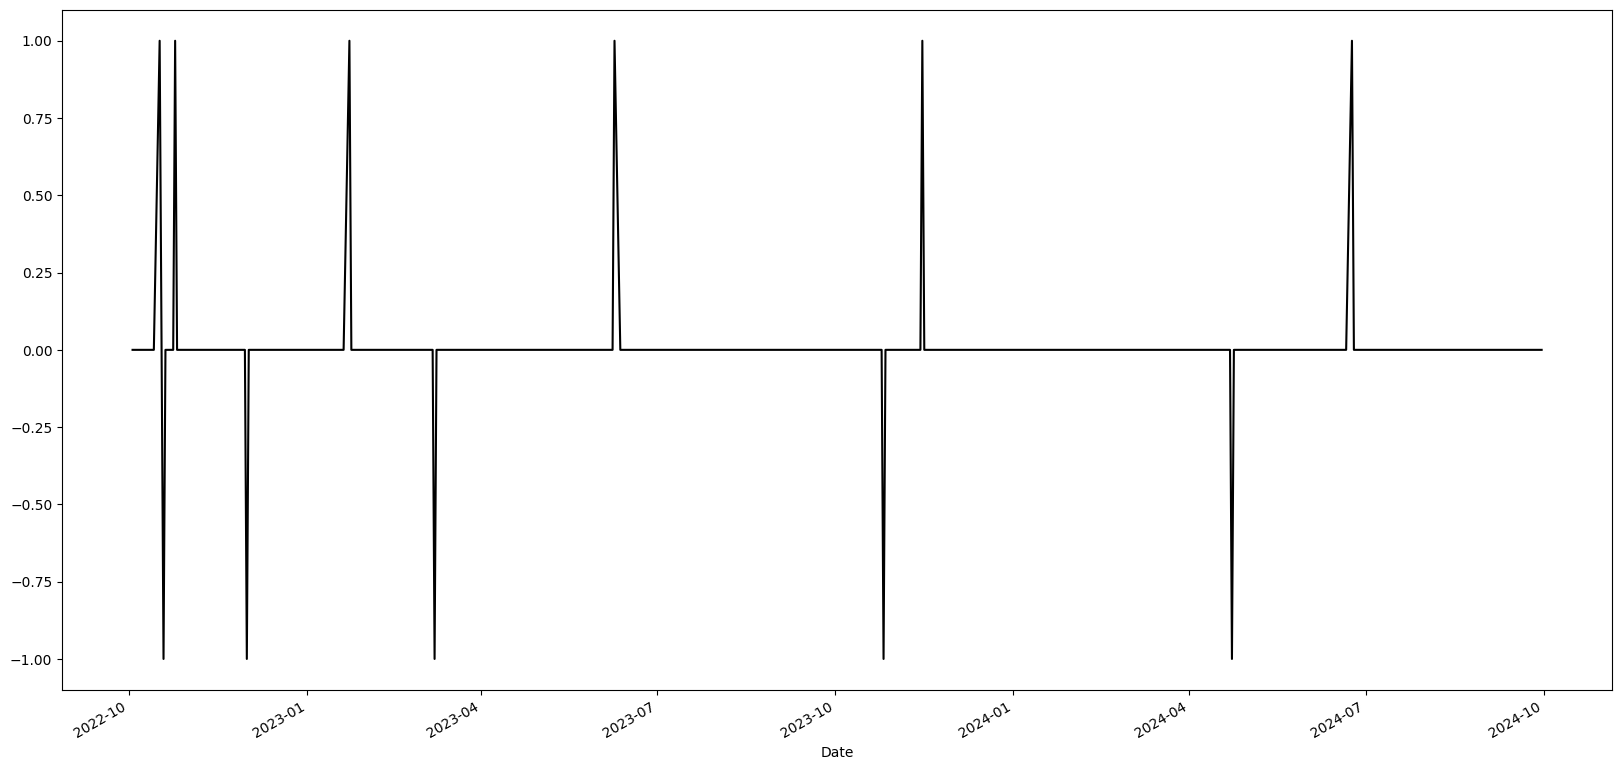

In [75]:
# Plot the positions
plt.figure(figsize = (20,10))
df['Position'].plot(color = 'k', label= 'Position')


Next we need to change the position signal to trade signals. Although position can give us this information, we want the change in the trade signal, which is the change from -1 to 1 to indicate a buy, and 1 to -1 to indicate a sell. This is for computing the Multiplicative Portfolio Returns.

<Axes: xlabel='Date'>

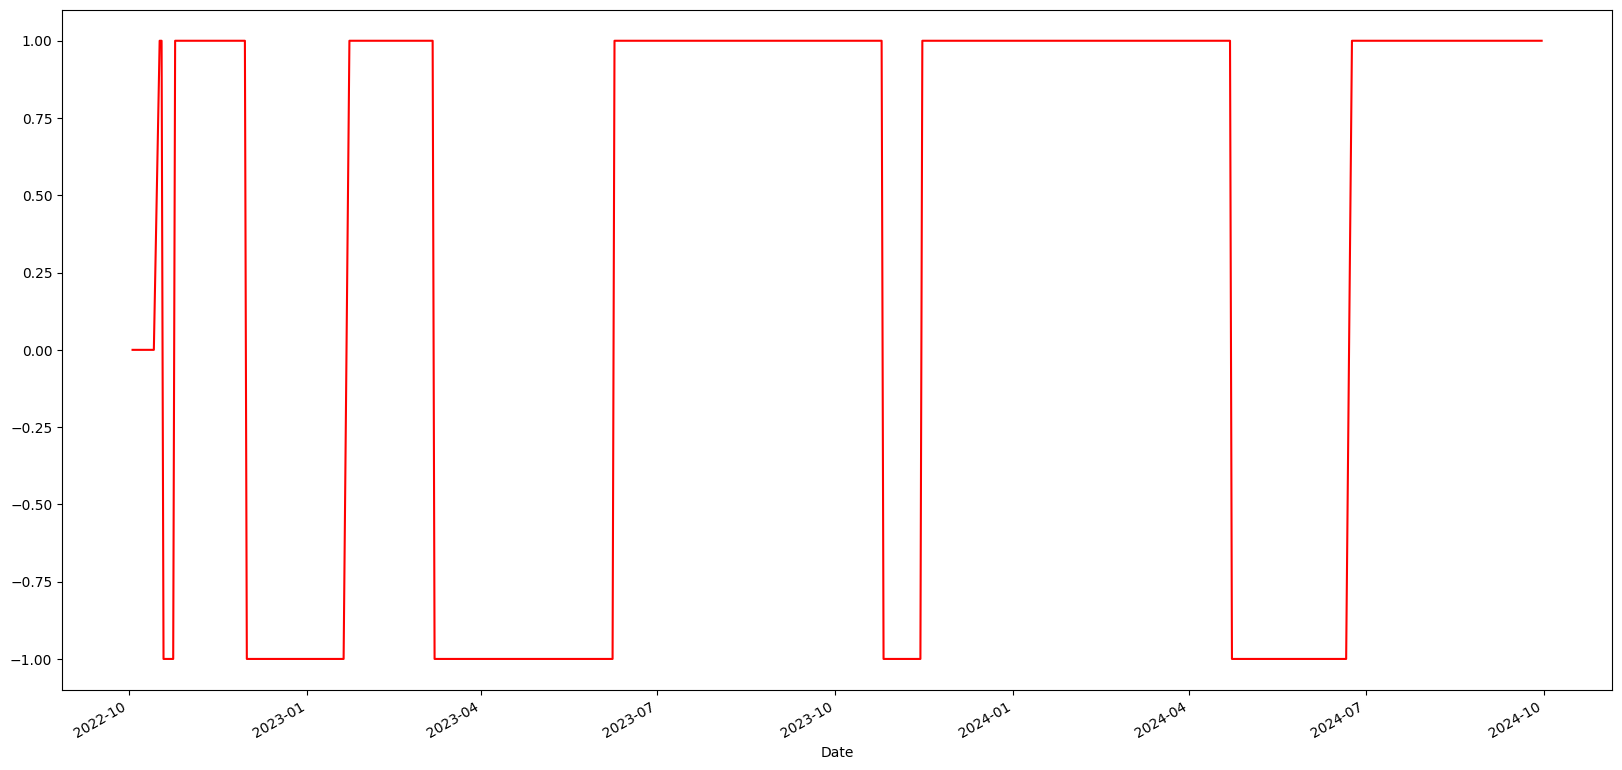

In [76]:
plt.figure(figsize = (20,10))
df['Trade'] = df['Position']
prevrow = df.iloc[0]

for index, row in df.iloc[1:].iterrows():
  if row['Trade']==0:
    if prevrow['Trade']!=0:
      df.at[index,'Trade']=prevrow['Trade']
      row['Trade']=prevrow['Trade']
  prevrow=row
df['Trade'].plot(color = 'r', label= 'Trade')

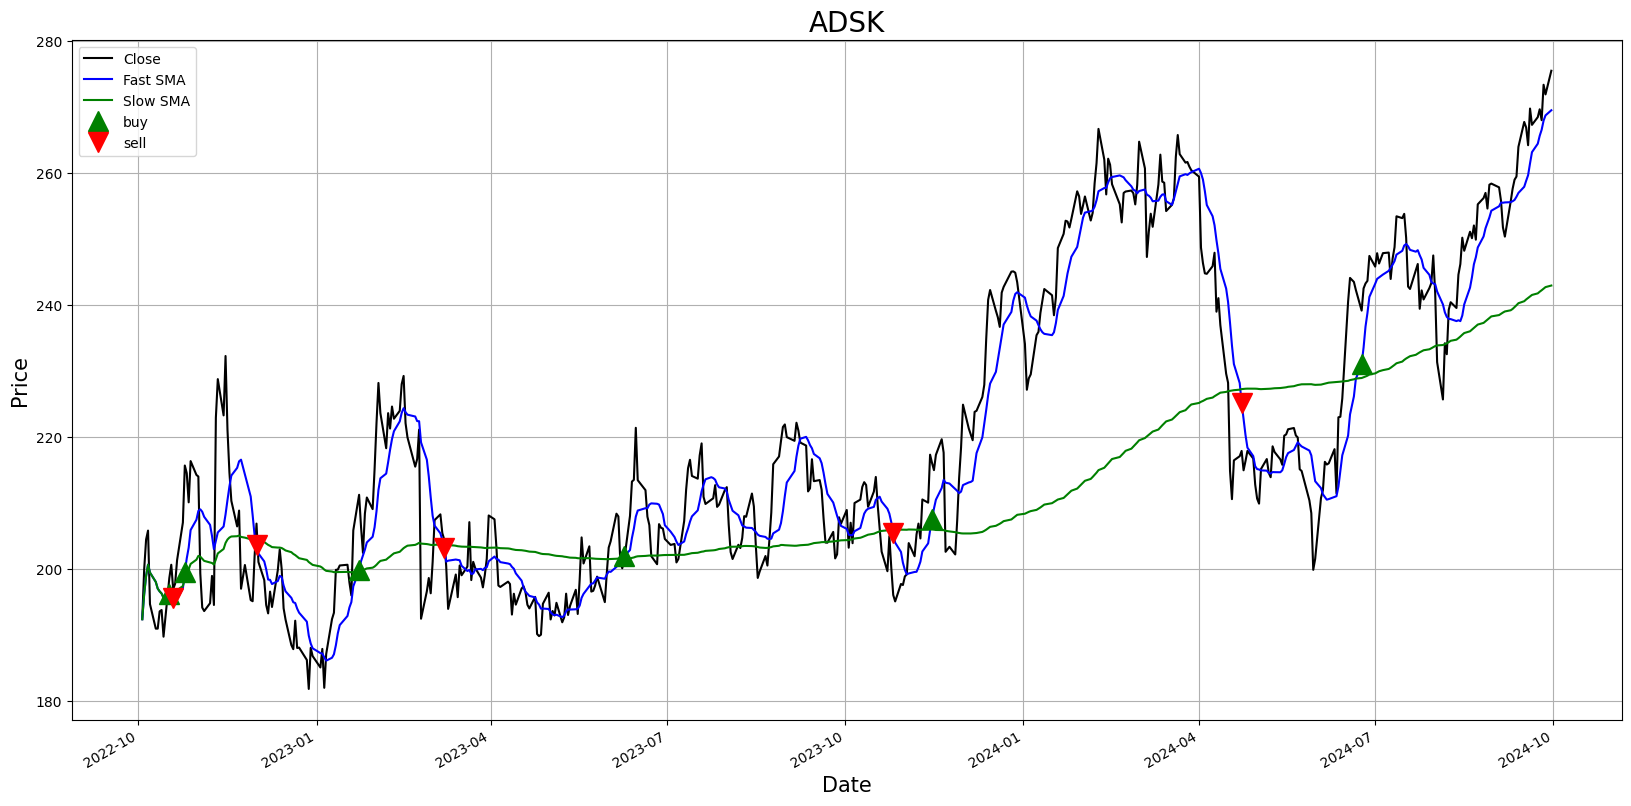

In [77]:
# plot close price, Fast and Slow simple moving averages
def plotprice(df):
  plt.figure(figsize = (20,10))
  df['Close'].plot(color = 'k', label= 'Close')
  df['Fast_SMA'].plot(color = 'b', label = 'Fast SMA')
  df['Slow_SMA'].plot(color = 'g', label = 'Slow SMA')
  # plot buy signals
  plt.plot(df[df['Position'] == 1].index, df['Fast_SMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
  # plot sell signals
  plt.plot(df[df['Position'] == -1].index, df['Fast_SMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
  plt.ylabel('Price', fontsize = 15 )
  plt.xlabel('Date', fontsize = 15 )
  plt.title('ADSK', fontsize = 20)
  plt.legend()
  plt.grid()
  plt.show()

plotprice(df)

It is not very clear in the plot above since it included the prices of many years. Lets zoom in to take a closer look.

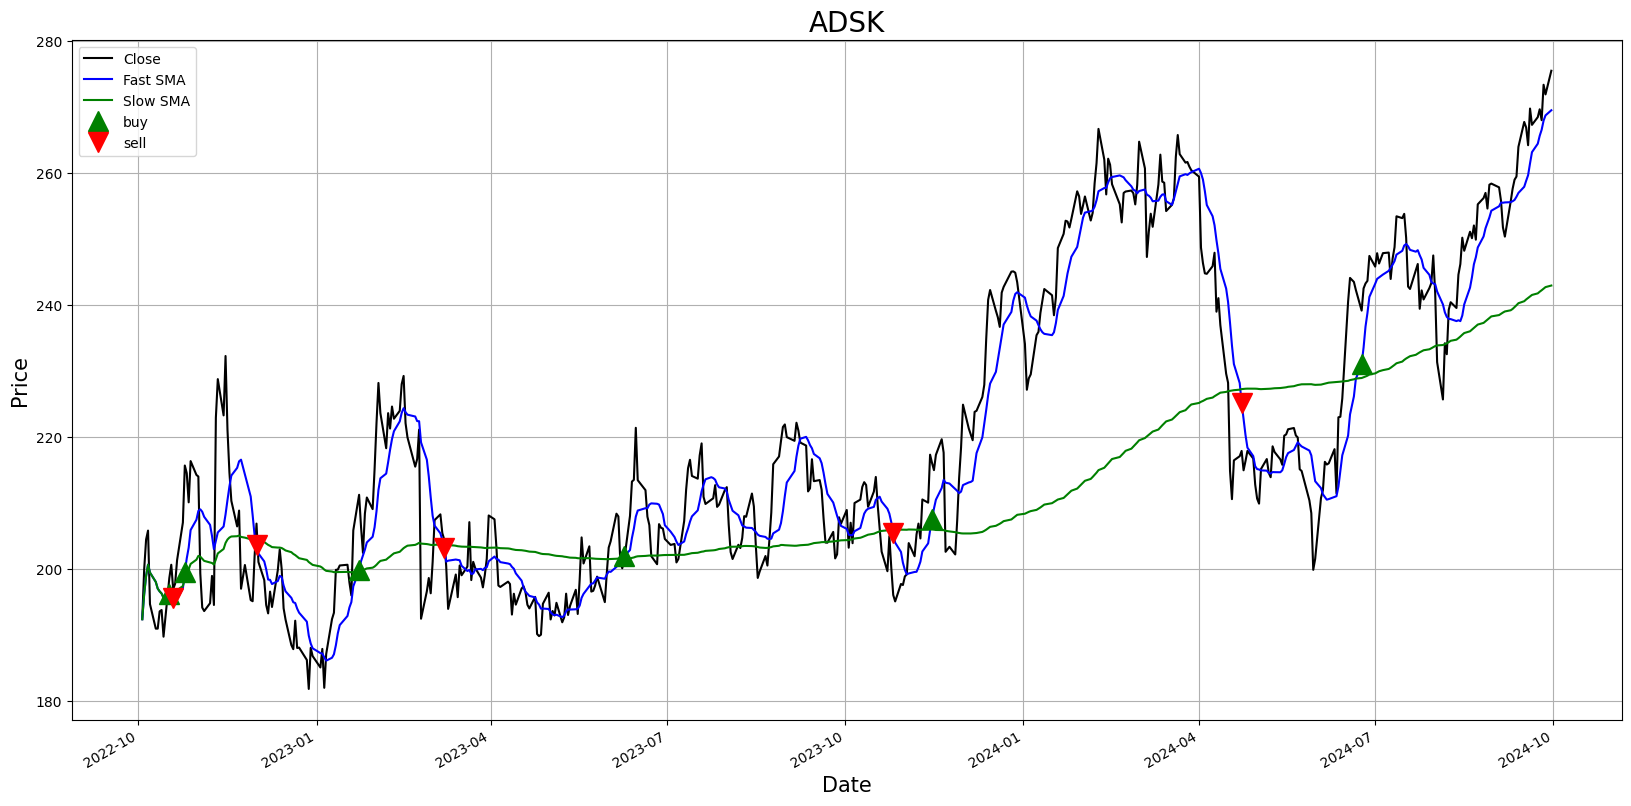

In [78]:
sdf=df
plotprice(sdf)


Notice that there is a buy at Apr 2009, but the buy and sell are performed at almost the same price at around May 2010. Since each trade incurs a transaction cost, trades at around the same price will result in losses. Hence a better trading strategy can be implemented, such as the introduction of a moving average band to reduce the number of trades around the same price. Refer to the paper on this for more details.

# 3. Computing portfolio returns

The computation of portfolio returns in this section is based on the multiplicative returns given by (refer equation 11 of the reference paper)

$\begin{equation}
R(T)=\{1+F(T-1)r(T)\}\{1-\delta|F(T)-F(T-1)|\}
\end{equation}$

where $r(T)=(y(T)/y(T-1))-1$; $y(T)$ is the closing price at time $T$; $F(T)$ is the action from the trading system; and $\delta$ is the transaction rate.

The multplicative profits $R$ can computed using

$\begin{equation}
R=\prod\limits_{T = 1}^{n} R(T)
\end{equation}$

where $n$ is the total number of time points.


0.0


<Axes: xlabel='Date'>

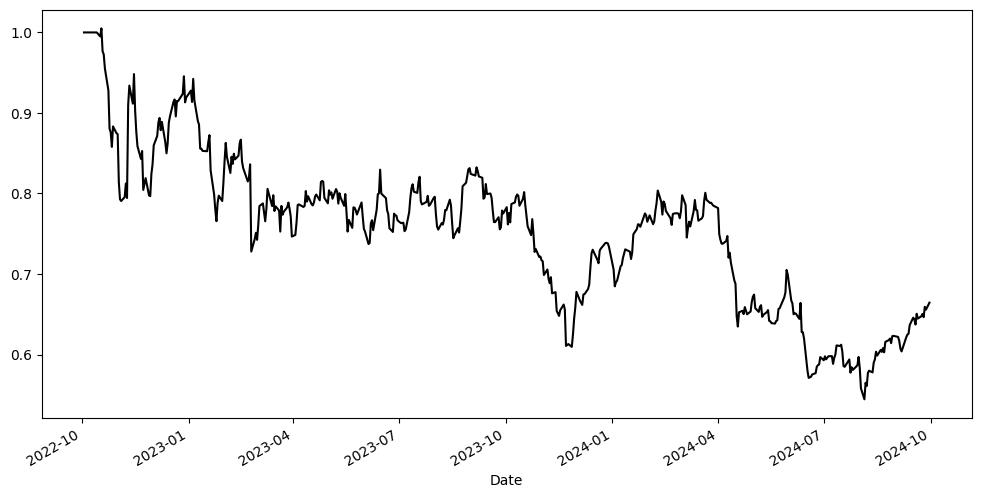

In [79]:
df['Returns']=1.0
print(df.iloc[1]['Trade'])

def computereturns(tdf,trate):
  prevrow = tdf.iloc[0]
  returncol=tdf.columns.get_loc('Returns')
  for i in range(len(tdf)):
    if i==0:
      prev_i=i
    else:
      prevrow=tdf.iloc[prev_i]
      row=tdf.iloc[i]
      rt=(row['Close']/prevrow['Close'])-1
      t=prevrow['Returns']*(1+prevrow['Trade']*rt)*(1-trate*abs(row['Trade']-prevrow['Trade']))
      tdf.iat[i,returncol]=t
      prev_i=i
  return tdf

df=computereturns(df,0.005)
plt.figure(figsize = (12,6))
#df.iloc[1:1000]['Returns'].plot(color = 'k', label= 'Returns')
df['Returns'].plot(color = 'k', label= 'Returns')


In [80]:
df['Returns'].iloc[-1]

0.6644656966031223

Notice in the above plot that some times the portfolio returns dropped below 1.0, some times it rises above 1.0 or even as high as 5.0. Hence this shows that the choice of trading strategy and parameters are very important to yield either profits or losses. Above 1.0 indicates there is overall profit. Less than 1.0 indicates there is a loss.


# Functions for all Trade Computations

The functions used for calculating trading signals are mentioned below as they would be used for calculating Returns for different experiments

In [81]:
def calculate_SMA(df, short_window_size, long_window_size):
    df['Fast_SMA'] = df['Close'].rolling(window=short_window_size, min_periods = 1).mean()
    df['Slow_SMA'] = df['Close'].rolling(window=long_window_size, min_periods = 1).mean()
    return df

In [82]:
def create_signal_and_position(df):
  df['Signal'] = 0.0
  df['Signal'] = np.where(df['Fast_SMA'] > df['Slow_SMA'], 1.0, 0.0)
  df['Position'] = df['Signal'].diff()
  # Need to set the first row of Position to 0. Otherwise it is nan from diff function.
  df['Position'].iloc[0]=0
  return df

In [83]:
def find_trade(df):
  df['Trade'] = df['Position']
  prevrow = df.iloc[0]
  for index, row in df.iloc[1:].iterrows():
    if row['Trade']==0:
      if prevrow['Trade']!=0:
        df.at[index,'Trade']=prevrow['Trade']
        row['Trade']=prevrow['Trade']
    prevrow=row
  return df

In [84]:
def plotprice(df, stock_name):
  plt.figure(figsize = (20,10))
  df['Close'].plot(color = 'k', label= 'Close')
  df['Fast_SMA'].plot(color = 'b', label = 'Fast SMA')
  df['Slow_SMA'].plot(color = 'g', label = 'Slow SMA')
  # plot buy signals
  plt.plot(df[df['Position'] == 1].index, df['Fast_SMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
  # plot sell signals
  plt.plot(df[df['Position'] == -1].index, df['Fast_SMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
  plt.ylabel('Price', fontsize = 15 )
  plt.xlabel('Date', fontsize = 15 )
  plt.title(f'{stock_name}', fontsize = 20)
  plt.legend()
  plt.grid()

In [85]:
def computereturns(tdf,trate):
  tdf['Returns']=1.0
  prevrow = tdf.iloc[0]
  returncol=tdf.columns.get_loc('Returns')
  for i in range(len(tdf)):
    if i==0:
      prev_i=i
    else:
      prevrow=tdf.iloc[prev_i]
      row=tdf.iloc[i]
      if prevrow['Close']!=0:
        rt=(row['Close']/prevrow['Close'])-1
      else:
        rt=-1
      t=prevrow['Returns']*(1+prevrow['Trade']*rt)*(1-trate*abs(row['Trade']-prevrow['Trade']))
      tdf.iat[i,returncol]=t
      prev_i=i
  return tdf

# Approach followed for training the model and Calculating Returns using predicted prices

At the very first, we will train our benchmark model, that is, an LSTM model on dataset 2: NVDA. We have defined a class for creating datasets for training and testing. One class is defined for PricePrediction which entails the layers of the LSTM model. The train function iterates through epochs and batches to train the model.

### Price Difference approach
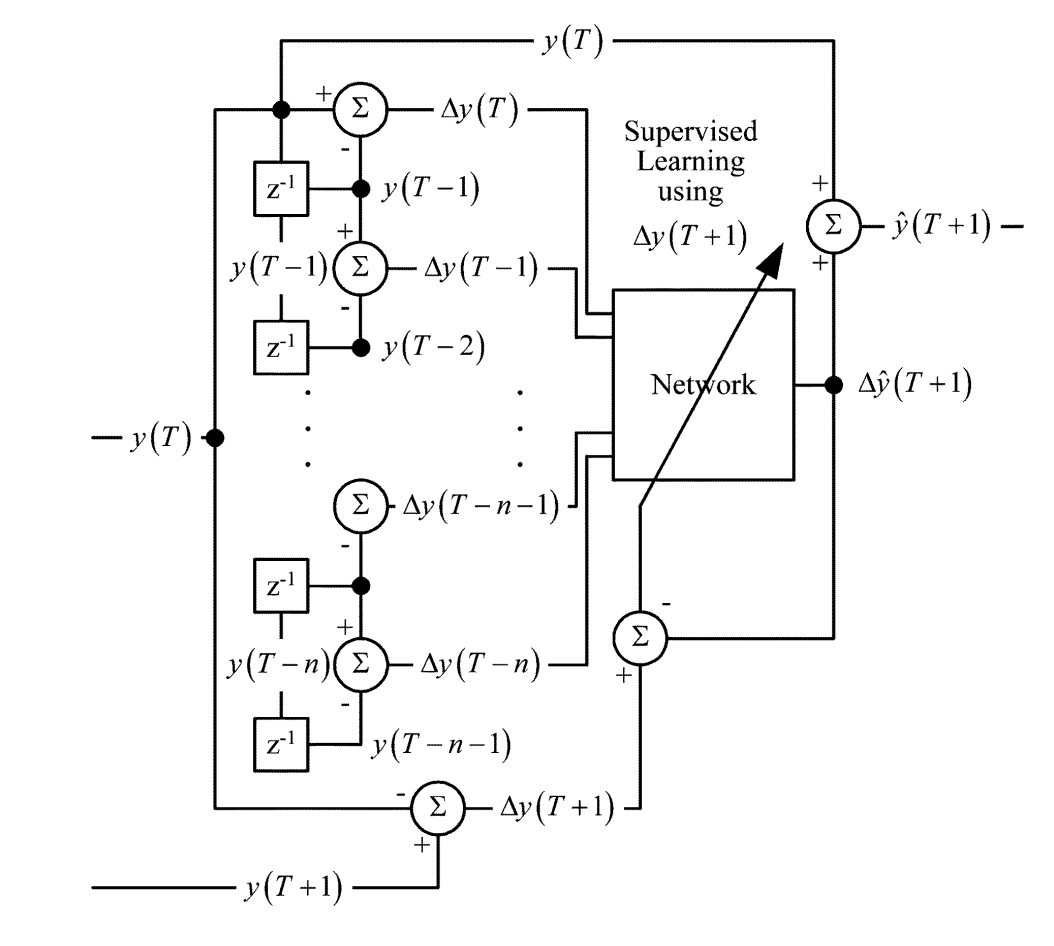

Stocks are non stationary in nature, that is, their mean and variance keeps changing over the time. Price predictions being obtained from non stationary data yields unreliable results since non-stationary time series are in general are unpredictable and cannot be modelled or forecasted. The model trained using non-stationary time series and the predicted results obtained are spurious in that they may indicate a relationship between two variables where one does
not exist.

Hence, the data should be converted into stationary time series before creating a model, so that the mean remains constant over time. To convert to stationary time series, we should apply differencing of prices. Instead of predicting y(T+1), predict the difference ∆ŷ(T+1) where ∆ is the difference operator.

In the below code, we have took a look_back which decides the period over which we want to pick up prices. For example, if look_back = 4, we take  [∆y(T-2),  ∆y(T-1),  ∆y(T)] as train data and ∆y(T+1) as our label

# Stock Prices: NVIDIA

Download NVIDIA dataset from yahoo finance

In [ ]:
stock_df = yf.download('NVDA')
stock_df.head()

[*********************100%***********************]  1 of 1 completed


Price                     Adj Close     Close      High       Low      Open  \
Ticker                         NVDA      NVDA      NVDA      NVDA      NVDA   
Date                                                                          
1999-01-22 00:00:00+00:00  0.037618  0.041016  0.048828  0.038802  0.043750   
1999-01-25 00:00:00+00:00  0.041559  0.045313  0.045833  0.041016  0.044271   
1999-01-26 00:00:00+00:00  0.038334  0.041797  0.046745  0.041146  0.045833   
1999-01-27 00:00:00+00:00  0.038215  0.041667  0.042969  0.039583  0.041927   
1999-01-28 00:00:00+00:00  0.038095  0.041536  0.041927  0.041276  0.041667   

Price                          Volume  
Ticker                           NVDA  
Date                                   
1999-01-22 00:00:00+00:00  2714688000  
1999-01-25 00:00:00+00:00   510480000  
1999-01-26 00:00:00+00:00   343200000  
1999-01-27 00:00:00+00:00   244368000  
1999-01-28 00:00:00+00:00   227520000

<Axes: title={'center': 'NVIDIA stock price'}, xlabel='Date'>

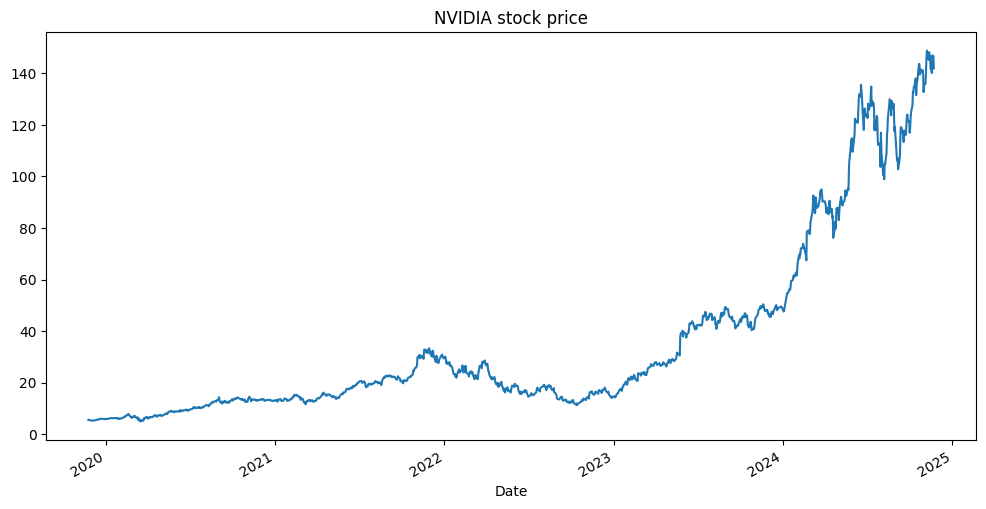

In [ ]:
ticker = yf.Ticker('NVDA')
stock_df = ticker.history(period="5y")
figure(figsize=(12, 6))
stock_df['Close'].plot(title="NVIDIA stock price")

In [ ]:
# Convert the index to datetime objects
stock_df.index = pd.to_datetime(stock_df.index)

# Filter the data for the specified date range
start_date = '2022-10-01'
end_date = '2024-09-30'
filtered_stock_df_nvda = stock_df[(stock_df.index >= start_date) & (stock_df.index <= end_date)]

filtered_stock_df_nvda

Open        High         Low       Close  \
Date                                                                        
2022-10-03 00:00:00-04:00   12.335720   12.666418   12.093941   12.500569   
2022-10-04 00:00:00-04:00   12.867234   13.207923   12.867234   13.154971   
2022-10-05 00:00:00-04:00   12.899205   13.308830   12.609470   13.196932   
2022-10-06 00:00:00-04:00   13.207924   13.643525   13.091030   13.118006   
2022-10-07 00:00:00-04:00   12.493577   12.658426   12.011018   12.064969   
...                               ...         ...         ...         ...   
2024-09-24 00:00:00-04:00  116.519997  121.800003  115.379997  120.870003   
2024-09-25 00:00:00-04:00  122.019997  124.940002  121.610001  123.510002   
2024-09-26 00:00:00-04:00  126.800003  127.669998  121.800003  124.040001   
2024-09-27 00:00:00-04:00  123.970001  124.029999  119.260002  121.400002   
2024-09-30 00:00:00-04:00  118.309998  121.500000  118.150002  121.440002   

                              Volume  Dividends  Stock Splits  
Date                                                           
2022-10-03 00:00:00-04:00  547478000        0.0           0.0  
2022-10-04 00:00:00-04:00  584182000        0.0           0.0  
2022-10-05 00:00:00-04:00  507131000        0.0           0.0  
2022-10-06 00:00:00-04:00  644157000        0.0           0.0  
2022-10-07 00:00:00-04:00  672478000        0.0           0.0  
...                              ...        ...           ...  
2024-09-24 00:00:00-04:00  354966800        0.0           0.0  
2024-09-25 00:00:00-04:00  284692900        0.0           0.0  
2024-09-26 00:00:00-04:00  302582900        0.0           0.0  
2024-09-27 00:00:00-04:00  271009200        0.0           0.0  
2024-09-30 00:00:00-04:00  226553700        0.0           0.0  

[501 rows x 7 columns]

# Computing trade signals and Portfolio Returns on Training Data of dataset 2

Here we will find out the random walk results on training part of NVIDIA dataset

In [ ]:
train_size_nvda = math.ceil(len(filtered_stock_df_nvda) * 0.7)
train_RW_df = filtered_stock_df_nvda.iloc[:train_size_nvda].copy(deep=True)

We have computed a fast 10 days and slow 200 days moving average on the close price.
**We have heuristcally determined rolling windows as 10 and 200 through trial and error**

In [ ]:
train_RW_df = calculate_SMA(df=train_RW_df, short_window_size=10, long_window_size=200)
train_RW_df = create_signal_and_position(train_RW_df)
train_RW_df = find_trade(train_RW_df)
train_RW_df = computereturns(train_RW_df,0.005)

<Axes: xlabel='Date'>

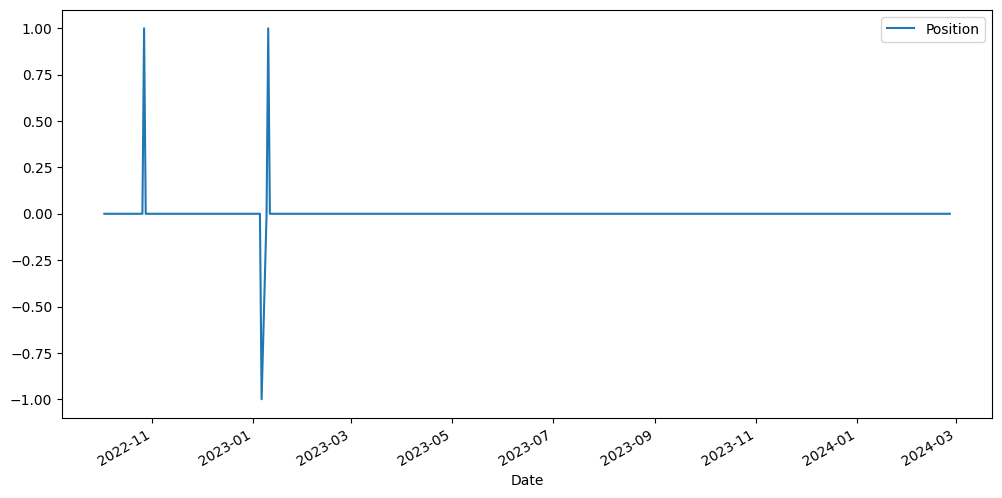

In [ ]:
train_RW_df.plot(y='Position', use_index=True, figsize=(12, 6))

<Axes: xlabel='Date'>

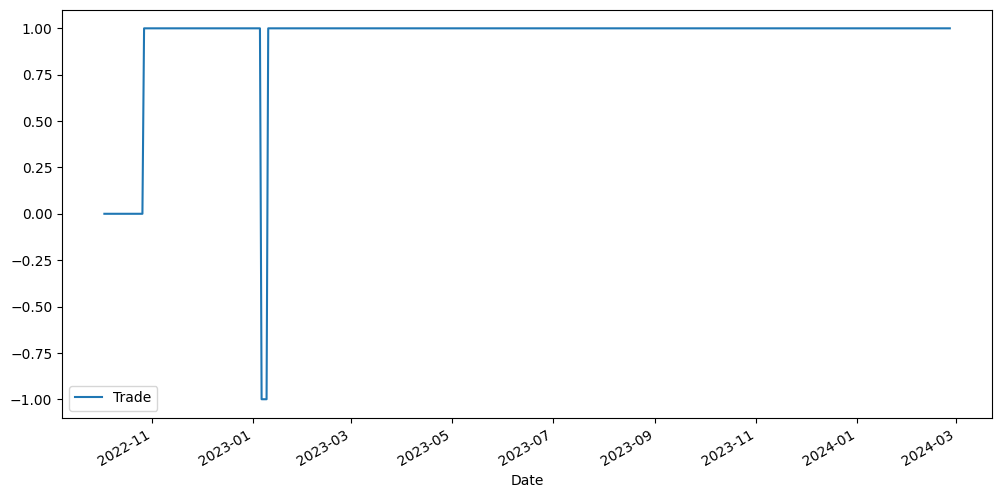

In [ ]:
train_RW_df.plot(y='Trade', use_index=True, figsize=(12, 6))

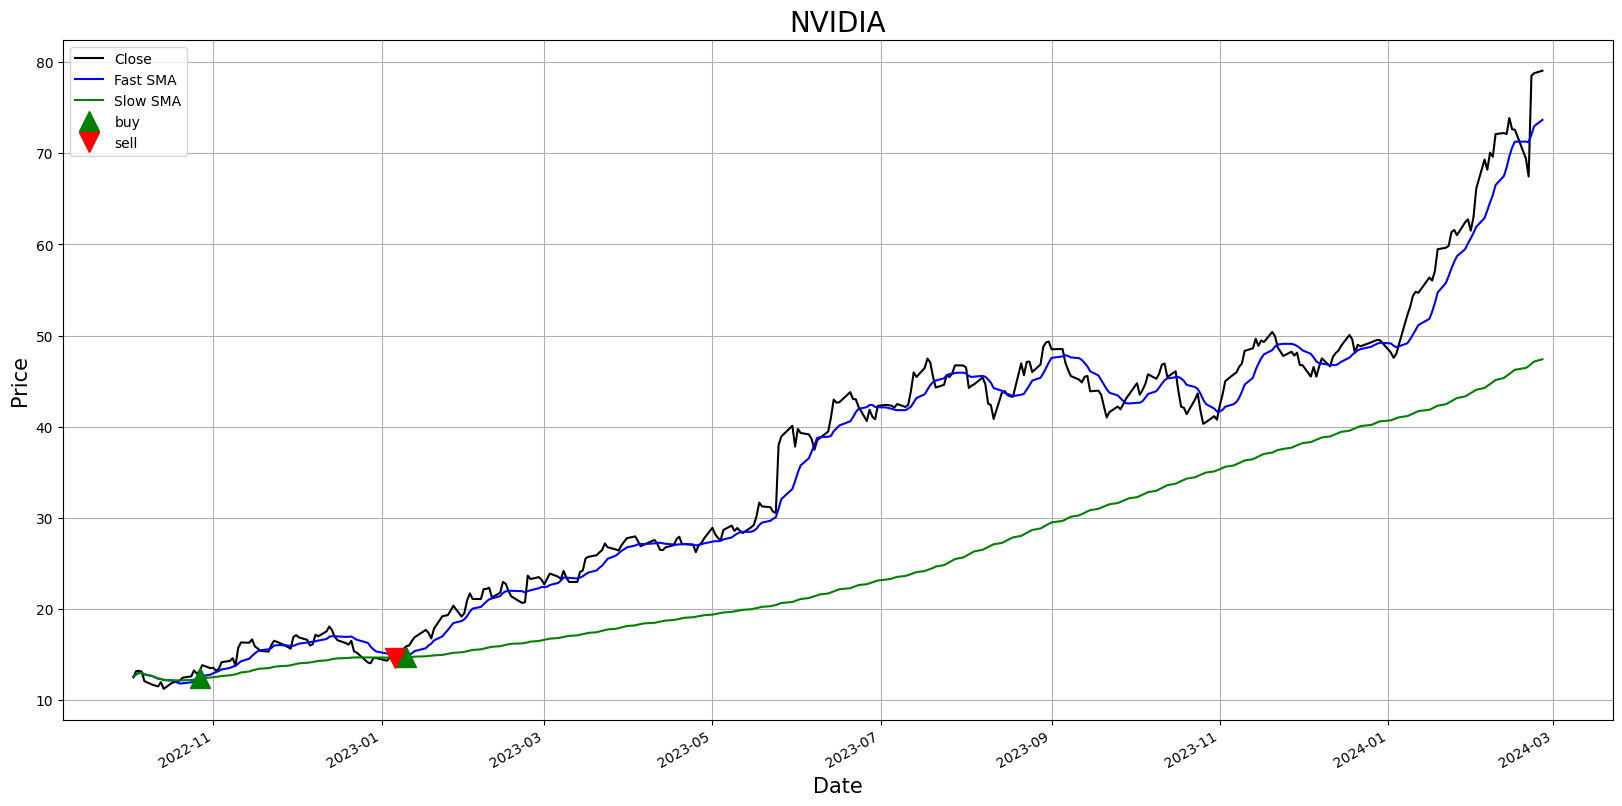

In [ ]:
plotprice(train_RW_df, "NVIDIA")

<Axes: xlabel='Date'>

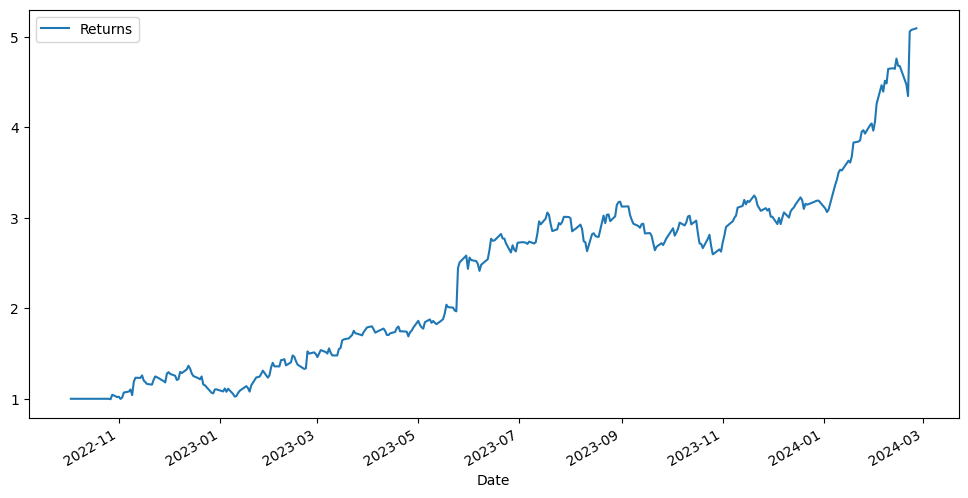

In [ ]:
train_RW_df.plot(y='Returns', use_index=True, figsize=(12, 6))

In [ ]:
# show returns
train_RW_df['Returns'].iloc[-1]
portfolio_return = train_RW_df['Returns'].iloc[-1]
if portfolio_return >=1:
  print("Final Portfolio Return on Dataset 2 Training Data: ", portfolio_return, "\nHence, profit.")
else:
  print("Final Portfolio Return on Dataset 2 Training Data: ", portfolio_return, "\nHence, loss.")

Final Portfolio Return on Dataset 2 Training Data:  5.09488678404817 
Hence, profit.


# Random Walk

A random walk model describes a time series
that consists of a succession of random steps. Given all the past time points, the next time point is random due to the
stochastic term. In its simplest form, the random walk hypothesis suggests that the day-to-day changes in the stock price should have a mean of zero.

Formally, the Random Walk model asserts that the value of
the time series should follow the stochastic difference
equation
𝑦 𝑇 = 𝑦(𝑇 − 1) + 𝜀 𝑇
where ε (T) is a normal random deviate with an expected
mean of zero

Therefore, the predicted value ŷ(T) using the Random walk
model is simply described by the equation
 ŷ(𝑇) = 𝑦(𝑇 − 1)
• As a benchmark, the best estimation of equation is the
Random Walk model, which suggests that the day-to-day
price change of a stock should have a mean value of zero

## RMSE and Portfolio Returns on Test Data of dataset 2

In [194]:
train_size_nvda = math.ceil(len(filtered_stock_df_nvda) * 0.7)

# Get performance of RW on test data
test_RW_df = filtered_stock_df_nvda.iloc[train_size_nvda:].copy(deep=True)
test_RW_df['Close_RW'] = test_RW_df['Close'].shift(1)
test_RW_df['Close_RW'] = test_RW_df['Close_RW'].fillna(0)

# RMSE between Actual Close price and Random walk close price
rmse = sqrt(mean_squared_error(test_RW_df['Close'], test_RW_df['Close_RW']))
rmse

7.500248198239906

In [195]:
df_RW_copy = test_RW_df.copy(deep=True)
df_RW_copy['Close'] = test_RW_df['Close_RW']
df_RW_copy = calculate_SMA(df=df_RW_copy, short_window_size=10, long_window_size=200)
df_RW_copy = create_signal_and_position(df_RW_copy)
df_RW_copy = find_trade(df_RW_copy)
df_RW_copy = computereturns(df_RW_copy,0.005)

<Axes: xlabel='Date'>

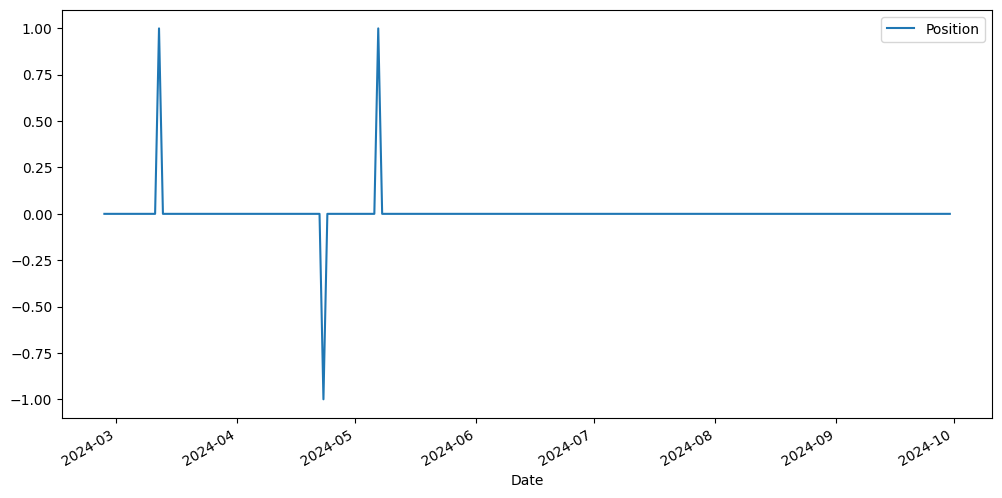

In [ ]:
df_RW_copy.plot(y='Position', use_index=True, figsize=(12, 6))

<Axes: xlabel='Date'>

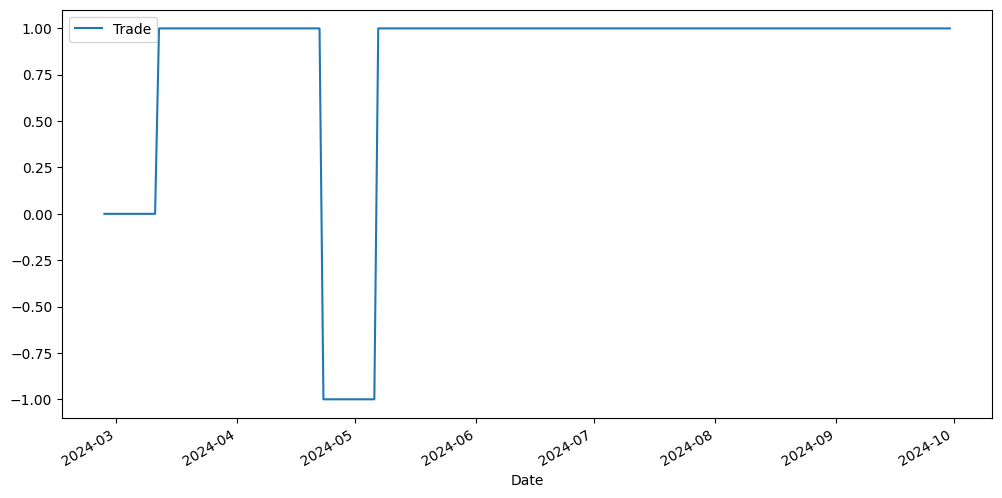

In [ ]:
df_RW_copy.plot(y='Trade', use_index=True, figsize=(12, 6))

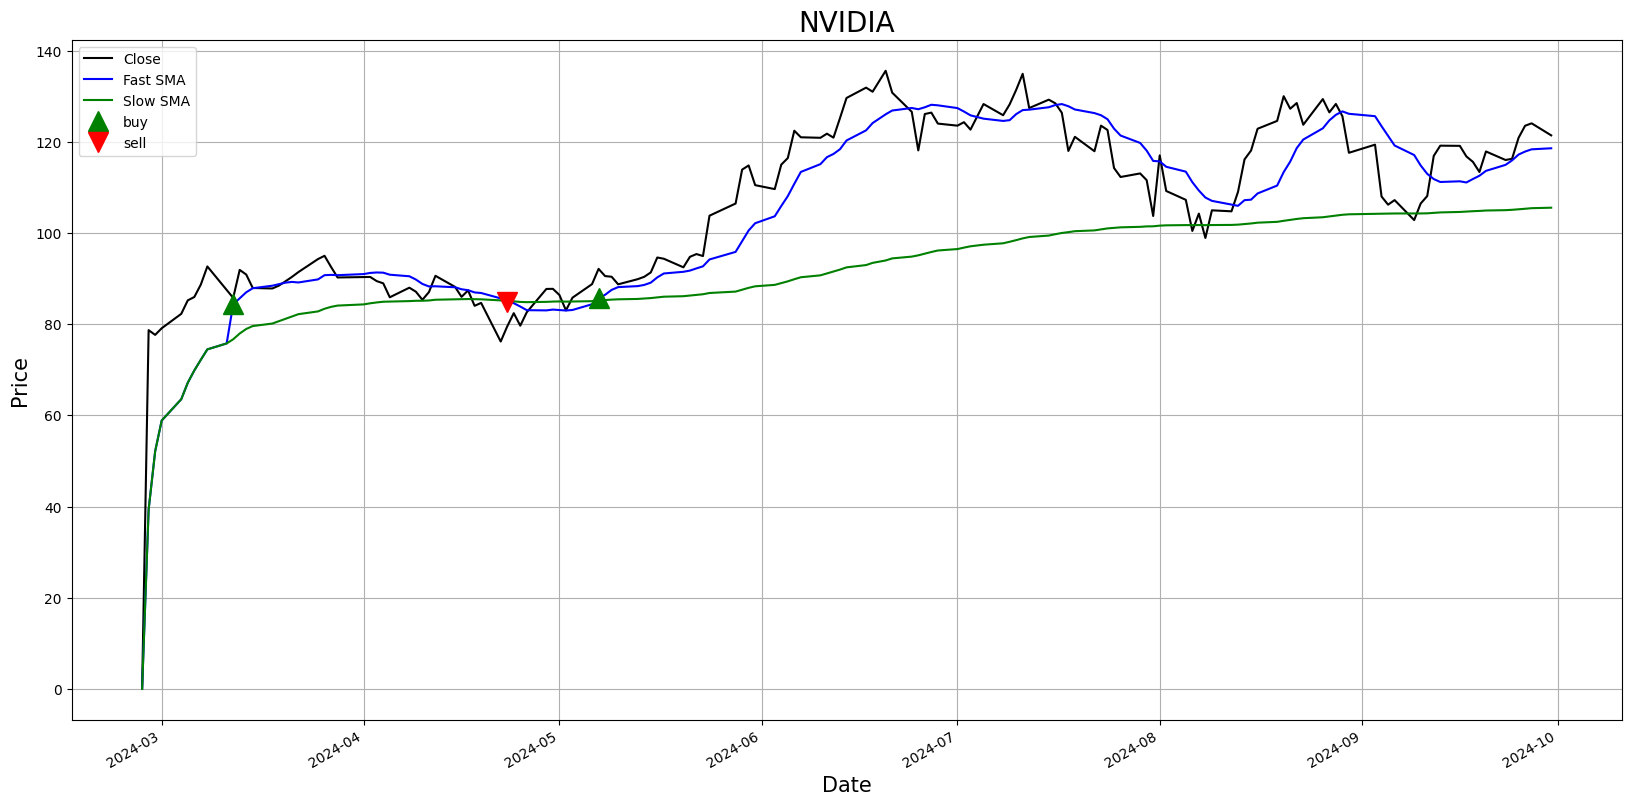

In [ ]:
plotprice(df_RW_copy, "NVIDIA")

<Axes: xlabel='Date'>

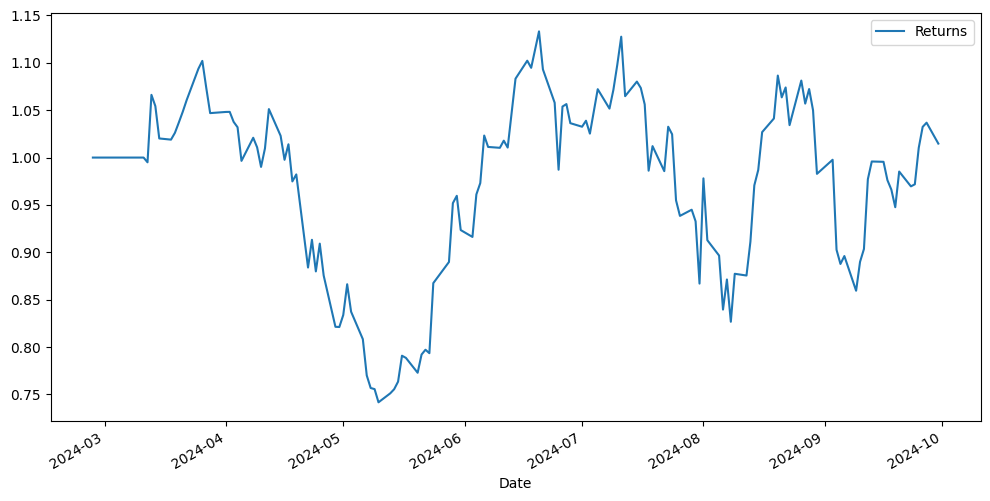

In [ ]:
df_RW_copy.plot(y='Returns', use_index=True, figsize=(12, 6))

In [ ]:
# show returns
df_RW_copy['Returns'].iloc[-1]
portfolio_return = df_RW_copy['Returns'].iloc[-1]
if portfolio_return >=1:
  print("Final Portfolio Return on Dataset 2 Testing Data: ", portfolio_return, "\nHence, profit.")
else:
  print("Final Portfolio Return on Dataset 2 Testing Data: ", portfolio_return, "\nHence, loss.")

Final Portfolio Return on Dataset 2 Testing Data:  1.0147456296777837 
Hence, profit.


Since profit is greater than 1, hence it is a profit

# Train Model on NVDA (Benchmark Model: LSTM)

## Dataset Class

In [ ]:
class TimeSeriesTrainDataPrep:
    """
    Generates training / validation / testing sets of time series pricing data
    """
    def __init__(self, data, look_back=5):
        self.look_back = look_back
        self.train_data = data
        self.price_difference_transform(self.train_data)

    def price_difference_transform(self, df):
        """
        Creates a dataset for price difference prediction. According to
        look_back period, price differences are calculated and accordingly features
        and labels are created.
        """
        X_data, Y_data = [], []
        y_current, y_future = [], []

        for i in range(self.look_back, len(self.train_data)):
            # get the required prices according to the lookback
            reqd_prices = self.train_data[i - self.look_back:i, :]
            change_in_price = []
            for j in range(len(reqd_prices)):
                if j < len(reqd_prices) - 1:
                    # price difference calculation
                    change_in_price.append(reqd_prices[j+1][0] - reqd_prices[j][0])

            change_in_price = np.array(change_in_price)
            X_data.append(change_in_price)  # Contains the price differences
            delta_predict_price = self.train_data[i, 0] - self.train_data[i-1, 0] #get label ∆y(T+1)
            Y_data.append(delta_predict_price)
            y_future.append(self.train_data[i, 0])  # save original y(T+1)
            y_current.append(self.train_data[i-1, 0])  # save original y(T)

        self.data = np.array(X_data)
        self.labels = np.array(Y_data)
        self.y_current = np.array(y_current)
        self.y_future = np.array(y_future)
        self.data = np.reshape(self.data, (self.data.shape[0], self.data.shape[1], 1))
        self.data = torch.tensor(self.data, dtype=torch.float32)
        self.labels = torch.tensor(self.labels, dtype=torch.float32)

    def __getitem__(self, idx):
        return (self.data[idx], self.labels[idx])

    def __len__(self):
        return len(self.data)


## LSTM model class

In [91]:
class PricePrediction(nn.Module):
  """
  Architecture for LSTM model for price prediction
  """

  def __init__(self, hidden_size, num_layers):
    super(PricePrediction, self).__init__()
    self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
    self.fc = nn.Linear(50, 1)

  def forward(self, x):
    x, _ = self.lstm(x)
    x = self.fc(x[:, -1, :])
    return x

In [ ]:
def train_model(model, data_loader, optimizer, loss_module, num_epochs=50):
    """
    Trains the model for a given number of epochs and batches
    """
    model.train()
    for epoch in tqdm(range(num_epochs)):
        running_loss = 0.0
        print('Epoch: {}/{}'.format(epoch+1, num_epochs))
        for batch_idx, (data_input, data_labels) in enumerate(data_loader):
            ## Step 1: Put features and labels onto selected devices
            data_input, data_labels = data_input.to(device), data_labels.to(device)

            ## Step 2: Get the predictions from the model
            preds = model(data_input)
            preds = preds.squeeze(dim=1)

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            running_loss += loss.item()
            optimizer.zero_grad()

            ## Step 4: Back propogation
            loss.backward()
            optimizer.step()
        print('Loss: {:.4f}'.format(running_loss/len(data_loader)))

## Training and Testing Benchmark on NVIDIA

We will now test our benchmark model against the test data of NVIDIA by comparing the RMSE and the portfolio returns

In [86]:
df_nvda = filtered_stock_df_nvda.copy(deep=True)

In [87]:
# Prepare data using dataset class
close_prices_nvda = df_nvda['Close'].values.reshape(-1, 1)
dataset_nvda = TimeSeriesTrainDataPrep(close_prices_nvda)

In [88]:
# Split into train and test
train_size_nvda = math.ceil(len(filtered_stock_df_nvda) * 0.7)
test_size_nvda = len(dataset_nvda.data) - train_size_nvda
X_train_nvda, X_test_nvda = dataset_nvda.data[0:train_size_nvda, :], dataset_nvda.data[train_size_nvda:len(dataset_nvda.data), :]
Y_train_nvda, Y_test_nvda = dataset_nvda.labels[0:train_size_nvda], dataset_nvda.labels[train_size_nvda:len(dataset_nvda.labels)]
y_future_test_nvda = np.array(dataset_nvda.y_future[train_size_nvda:len(dataset_nvda.y_future)])
y_current_test_nvda = np.array(dataset_nvda.y_current[train_size_nvda:len(dataset_nvda.y_current)])

In [89]:
# Model Hyperparameters
hidden_size = 50
num_layers = 3

In [ ]:
# Train model
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)
model = PricePrediction(hidden_size=hidden_size, num_layers=num_layers)
model.to(device)

# Get loss module and optimizer
loss_module = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_data_loader = DataLoader(TensorDataset(X_train_nvda, Y_train_nvda), batch_size=32, shuffle=False)
train_model(model=model, data_loader=train_data_loader, optimizer=optimizer, loss_module=loss_module, num_epochs=200)

Device cpu


  0%|          | 1/200 [00:00<00:22,  8.82it/s]

Epoch: 1/200
Loss: 1.4359
Epoch: 2/200
Loss: 1.4168
Epoch: 3/200


  2%|▎         | 5/200 [00:00<00:18, 10.83it/s]

Loss: 1.4184
Epoch: 4/200
Loss: 1.4185
Epoch: 5/200
Loss: 1.4165
Epoch: 6/200


  4%|▎         | 7/200 [00:00<00:16, 11.37it/s]

Loss: 1.4139
Epoch: 7/200
Loss: 1.4106
Epoch: 8/200
Loss: 1.4060
Epoch: 9/200


  6%|▌         | 11/200 [00:00<00:16, 11.30it/s]

Loss: 1.4004
Epoch: 10/200
Loss: 1.3951
Epoch: 11/200
Loss: 1.3907
Epoch: 12/200


  6%|▋         | 13/200 [00:01<00:16, 11.15it/s]

Loss: 1.3862
Epoch: 13/200
Loss: 1.3816
Epoch: 14/200
Loss: 1.3770
Epoch: 15/200


  8%|▊         | 17/200 [00:01<00:16, 10.85it/s]

Loss: 1.3722
Epoch: 16/200
Loss: 1.3670
Epoch: 17/200
Loss: 1.3612
Epoch: 18/200


 10%|▉         | 19/200 [00:01<00:16, 10.81it/s]

Loss: 1.3547
Epoch: 19/200
Loss: 1.3473
Epoch: 20/200
Loss: 1.3388
Epoch: 21/200


 10%|█         | 21/200 [00:01<00:16, 10.93it/s]

Loss: 1.3292
Epoch: 22/200
Loss: 1.3182
Epoch: 23/200


 12%|█▏        | 23/200 [00:02<00:16, 10.58it/s]

Loss: 1.3060
Epoch: 24/200
Loss: 1.2926
Epoch: 25/200


 14%|█▎        | 27/200 [00:02<00:16, 10.44it/s]

Loss: 1.2784
Epoch: 26/200
Loss: 1.2638
Epoch: 27/200
Loss: 1.2491
Epoch: 28/200


 14%|█▍        | 29/200 [00:02<00:16, 10.62it/s]

Loss: 1.2346
Epoch: 29/200
Loss: 1.2203
Epoch: 30/200
Loss: 1.2065
Epoch: 31/200


 16%|█▋        | 33/200 [00:03<00:15, 10.89it/s]

Loss: 1.1934
Epoch: 32/200
Loss: 1.1807
Epoch: 33/200
Loss: 1.1699
Epoch: 34/200


 18%|█▊        | 35/200 [00:03<00:15, 10.90it/s]

Loss: 1.1562
Epoch: 35/200
Loss: 1.1673
Epoch: 36/200
Loss: 1.2440
Epoch: 37/200


 20%|█▉        | 39/200 [00:03<00:15, 10.73it/s]

Loss: 1.1592
Epoch: 38/200
Loss: 1.1621
Epoch: 39/200
Loss: 1.1815
Epoch: 40/200


 20%|██        | 41/200 [00:03<00:14, 10.67it/s]

Loss: 1.1344
Epoch: 41/200
Loss: 1.1316
Epoch: 42/200
Loss: 1.1262
Epoch: 43/200


 22%|██▎       | 45/200 [00:04<00:13, 11.27it/s]

Loss: 1.1030
Epoch: 44/200
Loss: 1.1017
Epoch: 45/200
Loss: 1.1124
Epoch: 46/200


 24%|██▎       | 47/200 [00:04<00:13, 11.36it/s]

Loss: 1.0908
Epoch: 47/200
Loss: 1.0832
Epoch: 48/200
Loss: 1.0793
Epoch: 49/200


 26%|██▌       | 51/200 [00:04<00:12, 11.84it/s]

Loss: 1.0762
Epoch: 50/200
Loss: 1.0755
Epoch: 51/200
Loss: 1.0880
Epoch: 52/200


 26%|██▋       | 53/200 [00:04<00:12, 12.00it/s]

Loss: 1.0733
Epoch: 53/200
Loss: 1.0696
Epoch: 54/200
Loss: 1.0664
Epoch: 55/200


 28%|██▊       | 57/200 [00:05<00:11, 12.13it/s]

Loss: 1.0788
Epoch: 56/200
Loss: 1.0646
Epoch: 57/200
Loss: 1.0590
Epoch: 58/200


 30%|██▉       | 59/200 [00:05<00:11, 12.19it/s]

Loss: 1.0570
Epoch: 59/200
Loss: 1.0625
Epoch: 60/200
Loss: 1.0576
Epoch: 61/200


 32%|███▏      | 63/200 [00:05<00:11, 12.05it/s]

Loss: 1.0628
Epoch: 62/200
Loss: 1.0534
Epoch: 63/200
Loss: 1.0529
Epoch: 64/200


 32%|███▎      | 65/200 [00:05<00:10, 12.39it/s]

Loss: 1.0498
Epoch: 65/200
Loss: 1.0526
Epoch: 66/200
Loss: 1.0486
Epoch: 67/200


 34%|███▍      | 69/200 [00:06<00:10, 12.33it/s]

Loss: 1.0514
Epoch: 68/200
Loss: 1.0464
Epoch: 69/200
Loss: 1.0481
Epoch: 70/200


 36%|███▌      | 71/200 [00:06<00:10, 12.21it/s]

Loss: 1.0443
Epoch: 71/200
Loss: 1.0458
Epoch: 72/200
Loss: 1.0427
Epoch: 73/200


 38%|███▊      | 75/200 [00:06<00:10, 12.10it/s]

Loss: 1.0445
Epoch: 74/200
Loss: 1.0413
Epoch: 75/200
Loss: 1.0433
Epoch: 76/200


 38%|███▊      | 77/200 [00:06<00:09, 12.34it/s]

Loss: 1.0400
Epoch: 77/200
Loss: 1.0417
Epoch: 78/200
Loss: 1.0386
Epoch: 79/200


 40%|████      | 81/200 [00:07<00:09, 12.25it/s]

Loss: 1.0402
Epoch: 80/200
Loss: 1.0374
Epoch: 81/200
Loss: 1.0390
Epoch: 82/200


 42%|████▏     | 83/200 [00:07<00:09, 12.43it/s]

Loss: 1.0363
Epoch: 83/200
Loss: 1.0380
Epoch: 84/200
Loss: 1.0353
Epoch: 85/200


 44%|████▎     | 87/200 [00:07<00:09, 12.15it/s]

Loss: 1.0370
Epoch: 86/200
Loss: 1.0343
Epoch: 87/200
Loss: 1.0359
Epoch: 88/200


 44%|████▍     | 89/200 [00:07<00:09, 12.27it/s]

Loss: 1.0333
Epoch: 89/200
Loss: 1.0348
Epoch: 90/200
Loss: 1.0322
Epoch: 91/200


 46%|████▋     | 93/200 [00:08<00:08, 12.24it/s]

Loss: 1.0336
Epoch: 92/200
Loss: 1.0312
Epoch: 93/200
Loss: 1.0325
Epoch: 94/200


 48%|████▊     | 95/200 [00:08<00:08, 12.25it/s]

Loss: 1.0303
Epoch: 95/200
Loss: 1.0316
Epoch: 96/200
Loss: 1.0293
Epoch: 97/200


 50%|████▉     | 99/200 [00:08<00:08, 11.99it/s]

Loss: 1.0307
Epoch: 98/200
Loss: 1.0285
Epoch: 99/200
Loss: 1.0298
Epoch: 100/200


 50%|█████     | 101/200 [00:08<00:08, 12.10it/s]

Loss: 1.0275
Epoch: 101/200
Loss: 1.0288
Epoch: 102/200
Loss: 1.0265
Epoch: 103/200


 52%|█████▎    | 105/200 [00:09<00:07, 11.96it/s]

Loss: 1.0277
Epoch: 104/200
Loss: 1.0254
Epoch: 105/200
Loss: 1.0264
Epoch: 106/200


 54%|█████▎    | 107/200 [00:09<00:07, 12.08it/s]

Loss: 1.0242
Epoch: 107/200
Loss: 1.0251
Epoch: 108/200


 55%|█████▍    | 109/200 [00:09<00:08, 10.48it/s]

Loss: 1.0232
Epoch: 109/200
Loss: 1.0240
Epoch: 110/200


 56%|█████▌    | 111/200 [00:09<00:09,  9.85it/s]

Loss: 1.0222
Epoch: 111/200
Loss: 1.0233
Epoch: 112/200


 56%|█████▋    | 113/200 [00:09<00:09,  9.35it/s]

Loss: 1.0215
Epoch: 113/200
Loss: 1.0230
Epoch: 114/200


 57%|█████▊    | 115/200 [00:10<00:09,  9.00it/s]

Loss: 1.0208
Epoch: 115/200
Loss: 1.0229
Epoch: 116/200


 58%|█████▊    | 117/200 [00:10<00:09,  8.81it/s]

Loss: 1.0201
Epoch: 117/200
Loss: 1.0226
Epoch: 118/200


 60%|█████▉    | 119/200 [00:10<00:09,  8.80it/s]

Loss: 1.0189
Epoch: 119/200
Loss: 1.0212
Epoch: 120/200


 60%|██████    | 121/200 [00:10<00:08,  8.84it/s]

Loss: 1.0165
Epoch: 121/200
Loss: 1.0177
Epoch: 122/200


 62%|██████▏   | 123/200 [00:11<00:10,  7.67it/s]

Loss: 1.0140
Epoch: 123/200
Loss: 1.0142
Epoch: 124/200


 62%|██████▎   | 125/200 [00:11<00:09,  7.56it/s]

Loss: 1.0126
Epoch: 125/200
Loss: 1.0129
Epoch: 126/200


 64%|██████▎   | 127/200 [00:11<00:10,  7.29it/s]

Loss: 1.0118
Epoch: 127/200
Loss: 1.0135
Epoch: 128/200


 64%|██████▍   | 129/200 [00:12<00:09,  7.16it/s]

Loss: 1.0116
Epoch: 129/200
Loss: 1.0168
Epoch: 130/200


 66%|██████▌   | 131/200 [00:12<00:08,  7.80it/s]

Loss: 1.0145
Epoch: 131/200
Loss: 1.0305
Epoch: 132/200


 66%|██████▋   | 133/200 [00:12<00:08,  7.75it/s]

Loss: 1.0432
Epoch: 133/200
Loss: 1.4991
Epoch: 134/200


 68%|██████▊   | 135/200 [00:12<00:08,  7.68it/s]

Loss: 1.4499
Epoch: 135/200
Loss: 1.4276
Epoch: 136/200


 69%|██████▉   | 138/200 [00:13<00:06,  9.26it/s]

Loss: 1.4062
Epoch: 137/200
Loss: 1.3904
Epoch: 138/200
Loss: 1.3810
Epoch: 139/200


 70%|███████   | 140/200 [00:13<00:05, 10.04it/s]

Loss: 1.3704
Epoch: 140/200
Loss: 1.3564
Epoch: 141/200
Loss: 1.3401
Epoch: 142/200


 72%|███████▏  | 144/200 [00:13<00:05, 10.54it/s]

Loss: 1.3191
Epoch: 143/200
Loss: 1.2885
Epoch: 144/200
Loss: 1.2431
Epoch: 145/200


 73%|███████▎  | 146/200 [00:13<00:04, 10.81it/s]

Loss: 1.1756
Epoch: 146/200
Loss: 1.0995
Epoch: 147/200
Loss: 1.0691
Epoch: 148/200


 75%|███████▌  | 150/200 [00:14<00:04, 10.71it/s]

Loss: 1.0492
Epoch: 149/200
Loss: 1.0794
Epoch: 150/200
Loss: 1.0643
Epoch: 151/200


 76%|███████▌  | 152/200 [00:14<00:04, 11.20it/s]

Loss: 1.0465
Epoch: 152/200
Loss: 1.0324
Epoch: 153/200
Loss: 1.0261
Epoch: 154/200


 78%|███████▊  | 156/200 [00:14<00:03, 11.71it/s]

Loss: 1.0252
Epoch: 155/200
Loss: 1.0246
Epoch: 156/200
Loss: 1.0309
Epoch: 157/200


 79%|███████▉  | 158/200 [00:14<00:03, 12.01it/s]

Loss: 1.0253
Epoch: 158/200
Loss: 1.0290
Epoch: 159/200
Loss: 1.0207
Epoch: 160/200


 81%|████████  | 162/200 [00:15<00:03, 11.94it/s]

Loss: 1.0192
Epoch: 161/200
Loss: 1.0154
Epoch: 162/200
Loss: 1.0144
Epoch: 163/200


 82%|████████▏ | 164/200 [00:15<00:02, 12.17it/s]

Loss: 1.0125
Epoch: 164/200
Loss: 1.0117
Epoch: 165/200
Loss: 1.0103
Epoch: 166/200


 84%|████████▍ | 168/200 [00:15<00:02, 12.34it/s]

Loss: 1.0097
Epoch: 167/200
Loss: 1.0082
Epoch: 168/200
Loss: 1.0078
Epoch: 169/200


 85%|████████▌ | 170/200 [00:15<00:02, 12.47it/s]

Loss: 1.0058
Epoch: 170/200
Loss: 1.0054
Epoch: 171/200
Loss: 1.0029
Epoch: 172/200


 87%|████████▋ | 174/200 [00:16<00:02, 11.76it/s]

Loss: 1.0020
Epoch: 173/200
Loss: 0.9992
Epoch: 174/200
Loss: 0.9978
Epoch: 175/200


 88%|████████▊ | 176/200 [00:16<00:02, 11.52it/s]

Loss: 0.9953
Epoch: 176/200
Loss: 0.9937
Epoch: 177/200
Loss: 0.9915
Epoch: 178/200


 90%|█████████ | 180/200 [00:16<00:01, 11.17it/s]

Loss: 0.9899
Epoch: 179/200
Loss: 0.9877
Epoch: 180/200
Loss: 0.9864
Epoch: 181/200


 91%|█████████ | 182/200 [00:16<00:01, 10.84it/s]

Loss: 0.9838
Epoch: 182/200
Loss: 0.9834
Epoch: 183/200
Loss: 0.9797
Epoch: 184/200


 93%|█████████▎| 186/200 [00:17<00:01, 10.97it/s]

Loss: 0.9806
Epoch: 185/200
Loss: 0.9755
Epoch: 186/200
Loss: 0.9788
Epoch: 187/200


 94%|█████████▍| 188/200 [00:17<00:01, 11.29it/s]

Loss: 0.9725
Epoch: 188/200
Loss: 0.9811
Epoch: 189/200
Loss: 0.9781
Epoch: 190/200


 96%|█████████▌| 192/200 [00:17<00:00, 11.93it/s]

Loss: 0.9899
Epoch: 191/200
Loss: 0.9863
Epoch: 192/200
Loss: 0.9765
Epoch: 193/200


 97%|█████████▋| 194/200 [00:17<00:00, 12.07it/s]

Loss: 0.9621
Epoch: 194/200
Loss: 0.9568
Epoch: 195/200
Loss: 0.9539
Epoch: 196/200


 99%|█████████▉| 198/200 [00:18<00:00, 11.31it/s]

Loss: 0.9497
Epoch: 197/200
Loss: 0.9477
Epoch: 198/200
Loss: 0.9437
Epoch: 199/200


100%|██████████| 200/200 [00:18<00:00, 10.82it/s]

Loss: 0.9427
Epoch: 200/200
Loss: 0.9392


This portion of the code is intended for consistency. The models provided are the best performing models. Instead you will be provided with file:

* NVDA_model_benchmark.tar

Which contain the actual models used in the testing of dataset 2

In [92]:
state_dict_2 = torch.load("NVDA_model_benchmark.tar")
model = PricePrediction(hidden_size=hidden_size, num_layers=num_layers)
model.load_state_dict(state_dict_2, strict=False)

<All keys matched successfully>

In [93]:
# Obtain predictions for test data and add the predicted price differences to current prices in test set for NVDA. Calculate RMSE between predicted future
# price and original future prices
pred_nvda = model(X_test_nvda)
pred_nvda = pred_nvda.reshape(1,-1)
y_pred_price = y_current_test_nvda + pred_nvda.detach().numpy()
rmse = sqrt(mean_squared_error(y_future_test_nvda, y_pred_price.reshape(-1,1)))
rmse

4.601562143215222

In [ ]:
state_dict = model.state_dict()
torch.save(state_dict, "NVDA_model_benchmark.tar")


## Benchmark Portfolio Returns Calculation on Test Data

Now we will calculate the portfolio results for the predicted price to compare with other methods later

In [94]:
df_nvda_benchmark = df_nvda[-test_size_nvda:].copy(deep=True)

In [97]:
# Assign new close prices, removing the old ones
df_nvda_benchmark['Close'] = y_pred_price.tolist()[0]

In [98]:
df_nvda_benchmark = calculate_SMA(df=df_nvda_benchmark, short_window_size=10, long_window_size=200) #calculate fast and slow sma
df_nvda_benchmark = create_signal_and_position(df_nvda_benchmark) # find the signal and position columns
df_nvda_benchmark = find_trade(df_nvda_benchmark) # find the trade column F(T)
df_nvda_benchmark = computereturns(df_nvda_benchmark,0.001) # Calculate Returns

<Axes: xlabel='Date'>

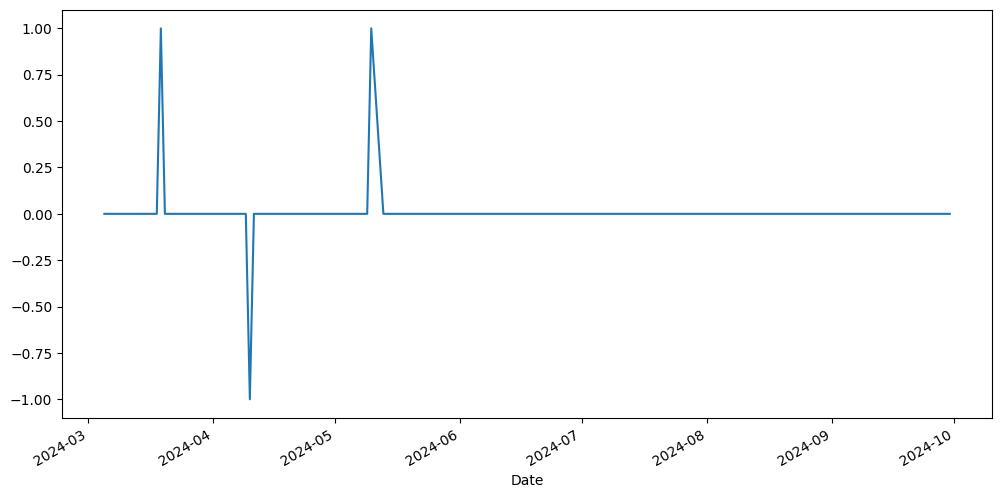

In [ ]:
plt.figure(figsize=(12, 6))
df_nvda_benchmark['Position'].plot()

<Axes: xlabel='Date'>

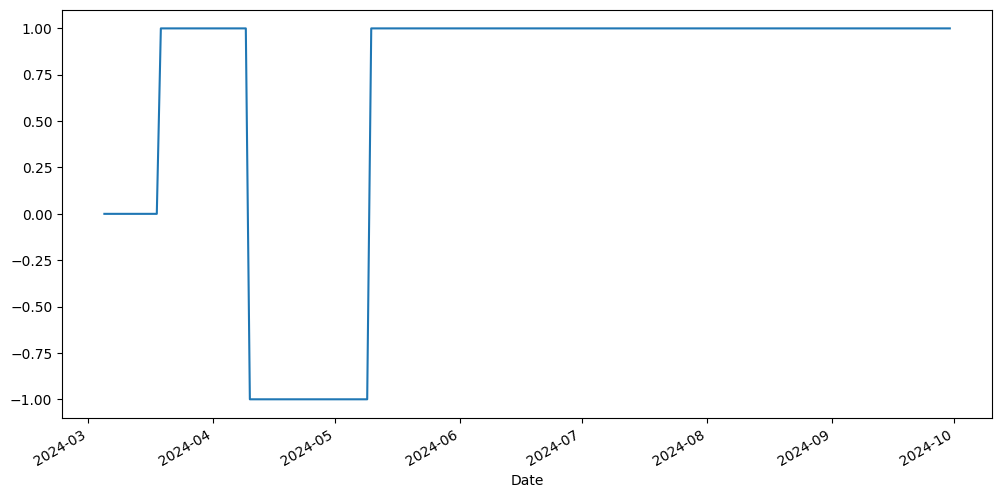

In [ ]:
plt.figure(figsize=(12, 6))
df_nvda_benchmark['Trade'].plot()

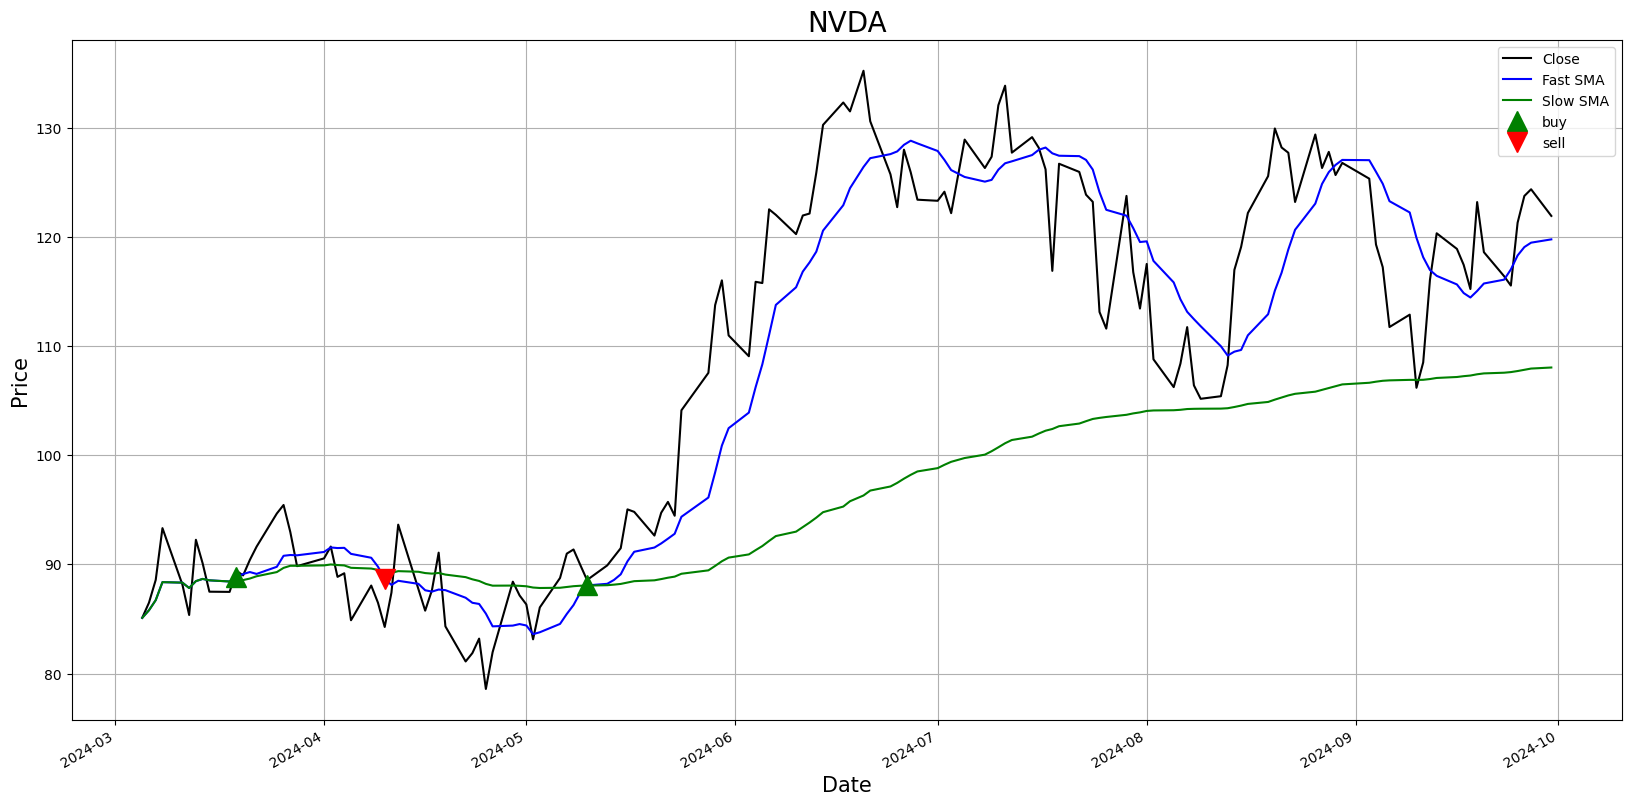

In [ ]:
plotprice(df_nvda_benchmark, "NVDA")

<Axes: xlabel='Date'>

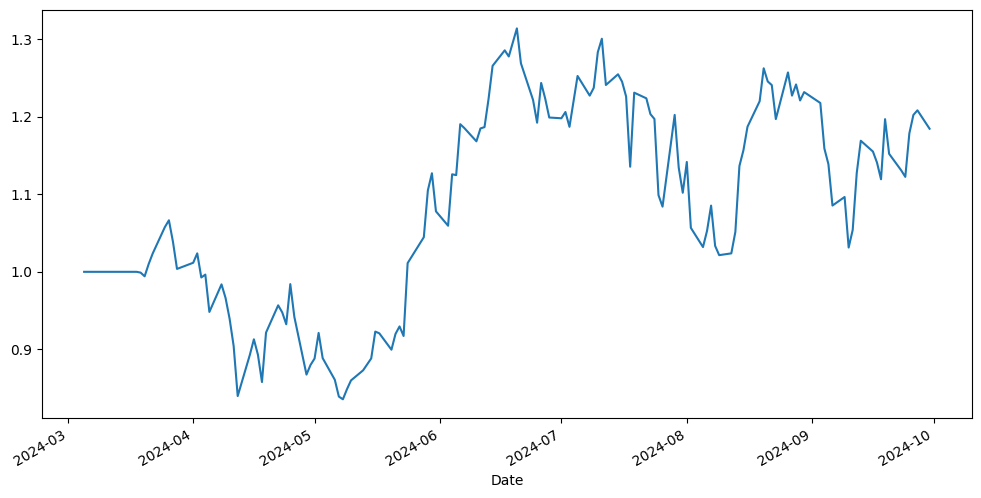

In [ ]:
plt.figure(figsize=(12, 6))
df_nvda_benchmark['Returns'].plot()

In [99]:
# show returns
df_nvda_benchmark['Returns'].iloc[-1]

portfolio_return = df_nvda_benchmark['Returns'].iloc[-1]
if portfolio_return >=1:
  print("Final Portfolio Return on Dataset 2 Testing Data: ", portfolio_return, "\nHence, profit.")
else:
  print("Final Portfolio Return on Dataset 2 Testing Data: ", portfolio_return, "\nHence, loss.")

Final Portfolio Return on Dataset 2 Testing Data:  1.1843426741155851 
Hence, profit.


Hence, the portfolio returns are greater than 1. Hence, profit. Also note that, the returns are higher as compared to random walk

# Hybrid AI Method: Fuzzy LSTM

## Popfnn class

In order to use Fuzzy Membership functions and POPFNN, we need to create the basic functions and classes to store the parameters.

We will use the Guassian 2mf membership function. This function has 2 parameters more than the Gaussian membership function. An evalmf function is also included to call the respective function to evaluate a membership output.



In [105]:
def gaussmf(x, params):
    assert len(params) == 2, 'Gaussmf function must have 2 parameters.'
    sig, c = np.asarray(params)
    return np.exp(-pow((x - c), 2) / (2 * pow(sig, 2)))

def gauss2mf(x, params):
    assert len(params) == 4, 'Gauss2mf function must have 4 parameters.'
    sig1, c1, sig2, c2 = np.asarray(params)
    assert c1 <= c2, 'c1 <= c2 is required.'
    if np.isscalar(x):
        if x<=c1:
            y=gaussmf(x, [sig1, c1])

        elif x>=c2:
            y=gaussmf(x, [sig2, c2])
        else:
            y=1
    else:
        y = np.ones(len(x))
        idx1 = (x <= c1)
        idx2 = (x > c2)
        y[idx1] = gaussmf(x[idx1], [sig1, c1])
        y[idx2] = gaussmf(x[idx2], [sig2, c2])
    return y

# This function overwrites the evalmf function of the fuzzy logic toolbox by looking for the function name defined by
# mf.Type and calling it directly.
def evalmf(mf, x):
    possibles = globals().copy()
    possibles.update(locals())
    method = possibles.get(mf.Type)
    return method(x, mf.Parameters)

Next we create a Fuzzy Membership function class to store the Fuzzy Membership function created, and a POPFNN class to store the input, output and fuzzy rules created.

#### **POPFNN**
   - This component applies fuzzy logic to improve prediction accuracy and decision-making.
   - The POPFNN consists of:
     - **Fuzzifier:** Converts crisp inputs into fuzzy values. (poplearn)
     - **Fuzzy Rule Base:** Stores the rules used in the fuzzy inference process, possibly designed for the specific prediction task. (identify_rules function)
     - **Fuzzy Inference Engine:** (poppredict function)
        - Uses the fuzzy rules to generate fuzzy outputs from the fuzzy inputs.
        - **Defuzzifier:** Converts the fuzzy output back into a crisp value for the final prediction.
   - This fuzzy layer likely provides interpretability and handles uncertainty in predictions, complementing the LSTM’s capabilities.

In [106]:
class fuzzymf(object):
    def __init__(self, Type, Parameters):
        self.Type = Type
        self.Parameters = Parameters
    def __repr__(self):
            return 'fismf, '\
                ' Type: %s, '\
                ' Parameters: %s\n'\
                % (self.Type,self.Parameters)

class popfnn(object):
    In_mf:fuzzymf
    Out_mf:fuzzymf
    N_inputs:int
    N_outlabels:int
    Lut_m:np
    Lut_d:np
    N_rules:int
    Pweights:np
    rule_label_dict:dict

    def __init__(self, In_mf, Out_mf, rule_label_dict):
        self.In_mf = In_mf
        self.Out_mf = Out_mf

        self.N_inputs=len(self.In_mf)
        self.N_outlabels=len(self.Out_mf[0])
        self.Lut_m=np.empty(self.N_inputs, np.int8)
        self.Lut_d=np.empty(self.N_inputs, np.int8)
        self.rule_label_dict = rule_label_dict

        # Calculate lookup tables for rule access
        self.N_rules = 1
        for i in range(self.N_inputs):
            self.Lut_m[i] = len(self.In_mf[i]) #n_mf
            self.Lut_d[i] = 1
            self.N_rules = self.N_rules * self.Lut_m[0]
            for j in range(i):
                self.Lut_d[j] = self.Lut_d[j] * self.Lut_m[j]

        # Initialize pseudo weights for all rules
        self.pweights = np.zeros([self.N_rules,self.N_outlabels])

    # returns the membership label given rule number and the ninput
    def getlabel(self, rule, ninput):
        return ( int((int(rule)/(self.Lut_d[ninput]))%self.Lut_m[ninput]));

    # prints all the rules
    def printruleslabels(self):
        print('N_inputs=',self.N_inputs)
        print('N_rules=',self.N_rules)
        print('N_output_mf=',self.N_outlabels)
        print('rule_number, labels, pweights')
        for i in range(self.N_rules):
            print(i,end = ' ')
            for j in range(self.N_inputs):
                print(self.getlabel(i,j),end = ' ')
            for j in range(self.N_outlabels):
                print(self.pweights[i][j],end = ' ')
            print(' ')

    # Enter code for question 8 here for print_int_labels
    def print_int_labels(self):
        for rule_number in range(self.N_rules):
            print("Rule", rule_number, ": If", end=" ")
            for i in range(self.N_inputs):
                print("x_{}".format(i + 1), "is", self.rule_label_dict[self.getlabel(rule_number, i)], end=" and ")
            print("Then y is", self.rule_label_dict[np.argmax(self.pweights[rule_number])])

    def poplearn(self, x, y):
        for r in range(self.N_rules):
            min_t=1.0
            for i in range(self.N_inputs):
                # Get the label of input i for rule r
                label=self.getlabel(r,i)
                # Compute membership of input i
                t=evalmf(self.In_mf[i][label],x[i])
                # Compute min across all input membership functions
                min_t=min(min_t,t)
            for i in range(self.N_outlabels):
                t=evalmf(self.Out_mf[0][i],y)
                self.pweights[r][i]+=min_t*t

    # Enter code for question 5 here for function identify_rules
    def identify_rules(self):
        for rule in range(self.N_rules):
          # Find the index of the maximum pweight
          consequent_index = np.argmax(self.pweights[rule])
          print(f"Rule {rule}: Consequent - Output Label {consequent_index}")

    def identify_significant_rules(self, significance_threshold):
        significant_rules = []
        for rule_index in range(len(self.pweights)):
            # Calculate the difference in pseudo weights for both output labels
            weight_diff = abs(self.pweights[rule_index][0] - self.pweights[rule_index][1])

            # If the difference is greater than the significance threshold, then the rule is considered significant
            if weight_diff > significance_threshold:
                significant_rules.append(rule_index)
        return significant_rules

    def poppredict(self, x, significant_threshold=10):
        """
        Predict the output label for an input x using the learned fuzzy rules.

        Parameters:
        - x: input feature vector (numpy array)

        Returns:
        - y: predicted label (crisp output)
        """

        significant_rules = self.identify_significant_rules(significance_threshold)
        if significant_rules is None:
            significant_rules = range(self.N_rules)  # Use all rules if not specified
        elif len(significant_rules) == 0:
            significant_rules = range(self.N_rules)

        predicted_labels = []

        output_range = np.linspace(-30, 30, 100)
        combined_u_x = np.zeros_like(output_range)
        # Iterate over each sample (row) in x
        for sample in x:
            consequent_mfs = [0] * self.N_outlabels
            # Iterate over each significant rule
            for rule_index in significant_rules:

                min_t = 1.0
                for input_index in range(self.N_inputs):
                    label = self.getlabel(rule_index, input_index)
                    t = evalmf(self.In_mf[input_index][label], sample[input_index])
                    min_t = min(min_t, t)

                # Step 2: Determine the consequent membership function after applying min(min_t, consequent_mf)
                for j, output_value in enumerate(output_range):
                    # Calculate the consequent membership degree using the output membership function
                    consequent_mf_value = evalmf(self.Out_mf[0][np.argmax(self.pweights[rule_index])], output_value)
                    combined_u_x[j] = max(combined_u_x[j], min(min_t, consequent_mf_value))

            # Step 3: Defuzzify using COA: COA = sum(u(x) * x) / sum(u(x))
            numerator = np.sum(combined_u_x * output_range)
            denominator = np.sum(combined_u_x)

            # Handle division by zero
            y_pred = numerator / denominator if denominator != 0 else 0.0
            predicted_labels.append(y_pred)

        return predicted_labels

## Span learnmem function

Next we create a simple function to generate a given number of membership functions that span the input space of the data.


In [107]:
# This function creates nlabels number of gauss2mf that spans min and max of the inputs
def span_learnmem(x, params):

    assert len(params) == 2, 'spam_learnmem function must have 2 parameters.'
    nlabels, width = np.asarray(params)
    nlabels=int(nlabels)

    # First get the max and min of each dimension
    maxx=np.amax(x, axis=0)
    minx=np.amin(x, axis=0)

    if x.ndim==1:
        ninputs=1
    else:
        ninputs=np.size(x,1)

    fis=[]
    for i in range(ninputs):
        if ninputs==1:
            centroids=np.linspace(minx,maxx,int(nlabels))
        else:
            centroids=np.linspace(minx[i],maxx[i],int(nlabels))

        sig=(centroids[1]-centroids[0])*width
        mf=[]
        for j in range(nlabels):
            mf.append(fuzzymf(Type = 'gauss2mf', Parameters = [sig, centroids[j], sig, centroids[j]]))
        fis.append(mf)
    return fis


## LVQ span learnmem

The Learning Vector Quantization (LVQ) algorithm is a lot like k-Nearest Neighbors. k-Nearest Neighbors need to keep a large database of training examples in order to make predictions. The LVQ algorithm addresses uses a much smaller subset of patterns to represent the training data. These are called codebooks. We need to compute distances between the codebooks and the examples.
Thus what we needed is a function to calculate the distance between two samples or rows in a dataset.
Rows of data are mostly made up of numbers and an easy way to calculate the distance between two rows or vectors of numbers is using the Euclidean distance measure.
The equation of Euclidean distance between vectors x and y with length n is defined as
\begin{equation*}
\sqrt{\sum_{k=1}^n (x_k - y_k)^2}
\end{equation*}
In other words, Euclidean distance is the square root of the sum of the squared differences between the two vectors.

We have created a LVQ_learnmem function with nlabels and tail parameter, tail parameter being set to true (If the tail parameter is true, then all the membership functions generated will cover the universe of discourse).

In [108]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def random_weight(traindata):
    n_records = len(traindata)
    weight = traindata[randrange(n_records)]
    return weight

def find_winner(weights, test_sample):
    distances = list()
    for weight_index, weight in enumerate(weights):
        dist = euclidean_distance(weight, test_sample)
        distances.append((weight_index, dist))
    distances.sort(key=lambda tuple: tuple[1])
    return distances[0][0]

def train_LVQ(traindata, weights, lrate, epochs):

    for epoch in range(epochs):
        rate = lrate * (1.0-(epoch/float(epochs)))
        sum_error = 0.0
        for row in traindata:
            winner_index = find_winner(weights, row)
            error = (row - weights[winner_index])
            sum_error = sum_error + sqrt(sum(error**2))
            weights[winner_index] = weights[winner_index] + rate * error
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, rate, sum_error))
    return weights

def LVQ_learnmem(x, params):
    assert len(params) == 2, 'learnmem2 function must have 2 parameters.'
    nlabels, tail = np.asarray(params)
    nlabels = int(nlabels)
    tail = bool(tail)

    # First get the max and min of each dimension
    maxx = np.amax(x, axis=0)
    minx = np.amin(x, axis=0)

    if x.ndim == 1:
        ninputs = 1
    else:
        ninputs = np.size(x, 1)

    fis = []

    weights = [random_weight(x) for i in range(nlabels)]
    new_weights = train_LVQ(x, weights, 0.3, 10) # get new weights after training LVQ algorithm

    for i in range(ninputs):
        # Calculate centroids based on the universe of discourse
        if ninputs == 1:
            centroids = new_weights
        else:
            centroids = [new_weights[j][i] for j in range(len(new_weights))]

        centroids.sort()

        # Calculate the spread (sig) so that adjacent Gaussians intersect at 0.5
        if nlabels > 1:
            # Distance between consecutive centroids
            centroid_spacing = centroids[1] - centroids[0]
            # Compute the spread to get intersection at 0.5 between centroids
            sig = centroid_spacing / (2 * np.sqrt(2 * np.log(2)))
        else:
            # If only one label, set sig to cover the range broadly
            centroid_spacing = centroids[1] - centroids[0]
            sig = centroid_spacing / 2

        mf = []
        for j in range(nlabels):
            if tail:
                # Modify the first and last membership functions to cover the range
                if j == 0:
                    # Left-most Gaussian (cover left tail)
                    mf.append(fuzzymf(Type='gauss2mf', Parameters=[sig, -np.inf, sig, centroids[j]]))
                elif j == nlabels - 1:
                    # Right-most Gaussian (cover right tail)
                    mf.append(fuzzymf(Type='gauss2mf', Parameters=[sig, centroids[j], sig, np.inf]))
                else:
                    # Middle Gaussian functions
                    mf.append(fuzzymf(Type='gauss2mf', Parameters=[sig, centroids[j], sig, centroids[j]]))
            else:
                # Default behavior without tails
                mf.append(fuzzymf(Type='gauss2mf', Parameters=[sig, centroids[j], sig, centroids[j]]))

        fis.append(mf)
    return fis


## Popfnn calling

We have kept nlabels=5 membership function, each membership function belonging to following labels:

*   increase
*   small increase
*   neutral
*   small decrease
*   decrease



We will now find fuzzy membership functions for Dataset 2: NVIDIA and train popfnn class on it, for it to learn rules and pweights

In [149]:
x = X_train_nvda.detach().numpy().squeeze(-1)
y = Y_train_nvda.detach().numpy()

inmf = LVQ_learnmem(x, [5, True])
outmf = span_learnmem(y, [5, 0.5])

>epoch=0, lrate=0.300, error=564.872
>epoch=1, lrate=0.270, error=602.291
>epoch=2, lrate=0.240, error=601.932
>epoch=3, lrate=0.210, error=594.106
>epoch=4, lrate=0.180, error=594.286
>epoch=5, lrate=0.150, error=583.256
>epoch=6, lrate=0.120, error=586.521
>epoch=7, lrate=0.090, error=575.579
>epoch=8, lrate=0.060, error=569.038
>epoch=9, lrate=0.030, error=566.939


In [150]:
rule_label_dict = {
    4: "increase",
    3: "small increase",
    2: "neutral",
    1: "small decrease",
    0: "decrease"
}
nf=popfnn(In_mf=inmf, Out_mf=outmf, rule_label_dict=rule_label_dict)

for k in range(len(x)):
    nf.poplearn(x[k],y[k])

In [110]:
nf.printruleslabels()
nf.identify_rules()

nf.print_int_labels()

N_inputs= 4
N_rules= 625
N_output_mf= 5
rule_number, labels, pweights
0 0 0 0 0 0.0014334317521271108 0.11648161009691112 0.4252342820369829 0.08914806755214467 0.023458847043884175  
1 0 0 0 1 0.0024582764664652233 0.19388095525690266 0.6947415301192847 0.07155152925049721 0.0010701292654490457  
2 0 0 0 2 0.0034991481354740878 0.2790590756594581 0.924118558914612 0.09434872868126974 0.0011692292223185  
3 0 0 0 3 0.0035929975688957054 0.277111312666262 0.9254180024690131 0.09802550550172977 0.001210355005267596  
4 0 0 0 4 0.06433198510340737 0.904227406867414 2.065246601407541 0.21560754014252106 0.0009369297398564655  
5 0 0 1 0 0.02649128391980704 0.5479406371074838 2.1593247209403654 0.36825648818595913 0.027177757486941376  
6 0 0 1 1 0.007095542711149943 0.9096487356241054 3.5834500157123435 0.40674916110731285 0.005463756148162743  
7 0 0 1 2 0.007980577563306473 1.0784094610820452 4.101931950289417 0.43512407392279406 0.005378917853236211  
8 0 0 1 3 0.00774614602520109 1.046

We will now find significant rules which are calculated by evaluating the absolute difference between the pseudo weights of two output labels and selecting those that exceed the given significance threshold.

    weight_diff = |pweights[rule_index][0] - pweights[rule_index][1]|




In [111]:
significance_threshold = 1
significant_rules = nf.identify_significant_rules(significance_threshold)
significant_rules

[7,
 8,
 11,
 12,
 13,
 14,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 91,
 92,
 93,
 94,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 114,
 119,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 144,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 254,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 269,
 275,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 300,
 304,
 305,

Text(0.5, 1.0, 'Membership Functions for Input x')

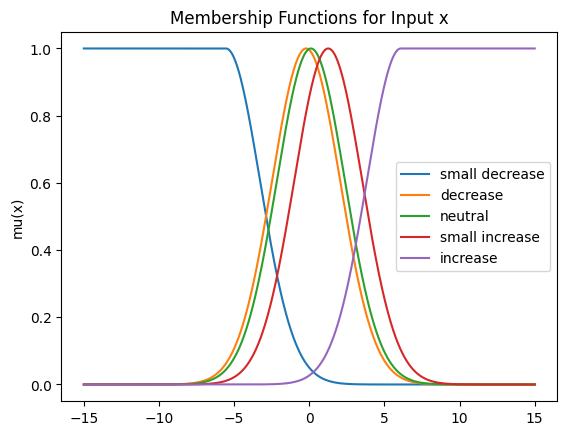

In [112]:
# Input membership function for x0
x = np.linspace(-15, 15, 1000)
plt.plot(x, evalmf(inmf[0][0], x), label="small decrease")
plt.plot(x, evalmf(inmf[0][1], x), label="decrease")
plt.plot(x, evalmf(inmf[0][2], x), label="neutral")
plt.plot(x, evalmf(inmf[0][3], x), label="small increase")
plt.plot(x, evalmf(inmf[0][4], x), label="increase")
plt.legend()
plt.ylabel('mu(x)')
plt.title('Membership Functions for Input x')

Text(0.5, 1.0, 'Membership Functions for Input y')

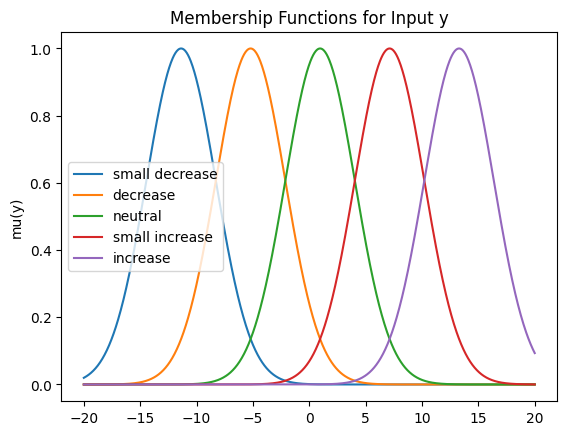

In [113]:
# Output membership function
y = np.linspace(-20, 20, 1000)
plt.plot(y, evalmf(outmf[0][0], y), label="small decrease")
plt.plot(y, evalmf(outmf[0][1], y), label="decrease")
plt.plot(y, evalmf(outmf[0][2], y), label="neutral")
plt.plot(y, evalmf(outmf[0][3], y), label="small increase")
plt.plot(y, evalmf(outmf[0][4], y), label="increase")
plt.legend()

plt.ylabel('mu(y)')
plt.title('Membership Functions for Input y')

## Fuzzy LSTM Training

In this section, we have created a Fuzzy LSTM model based on the following architecture:
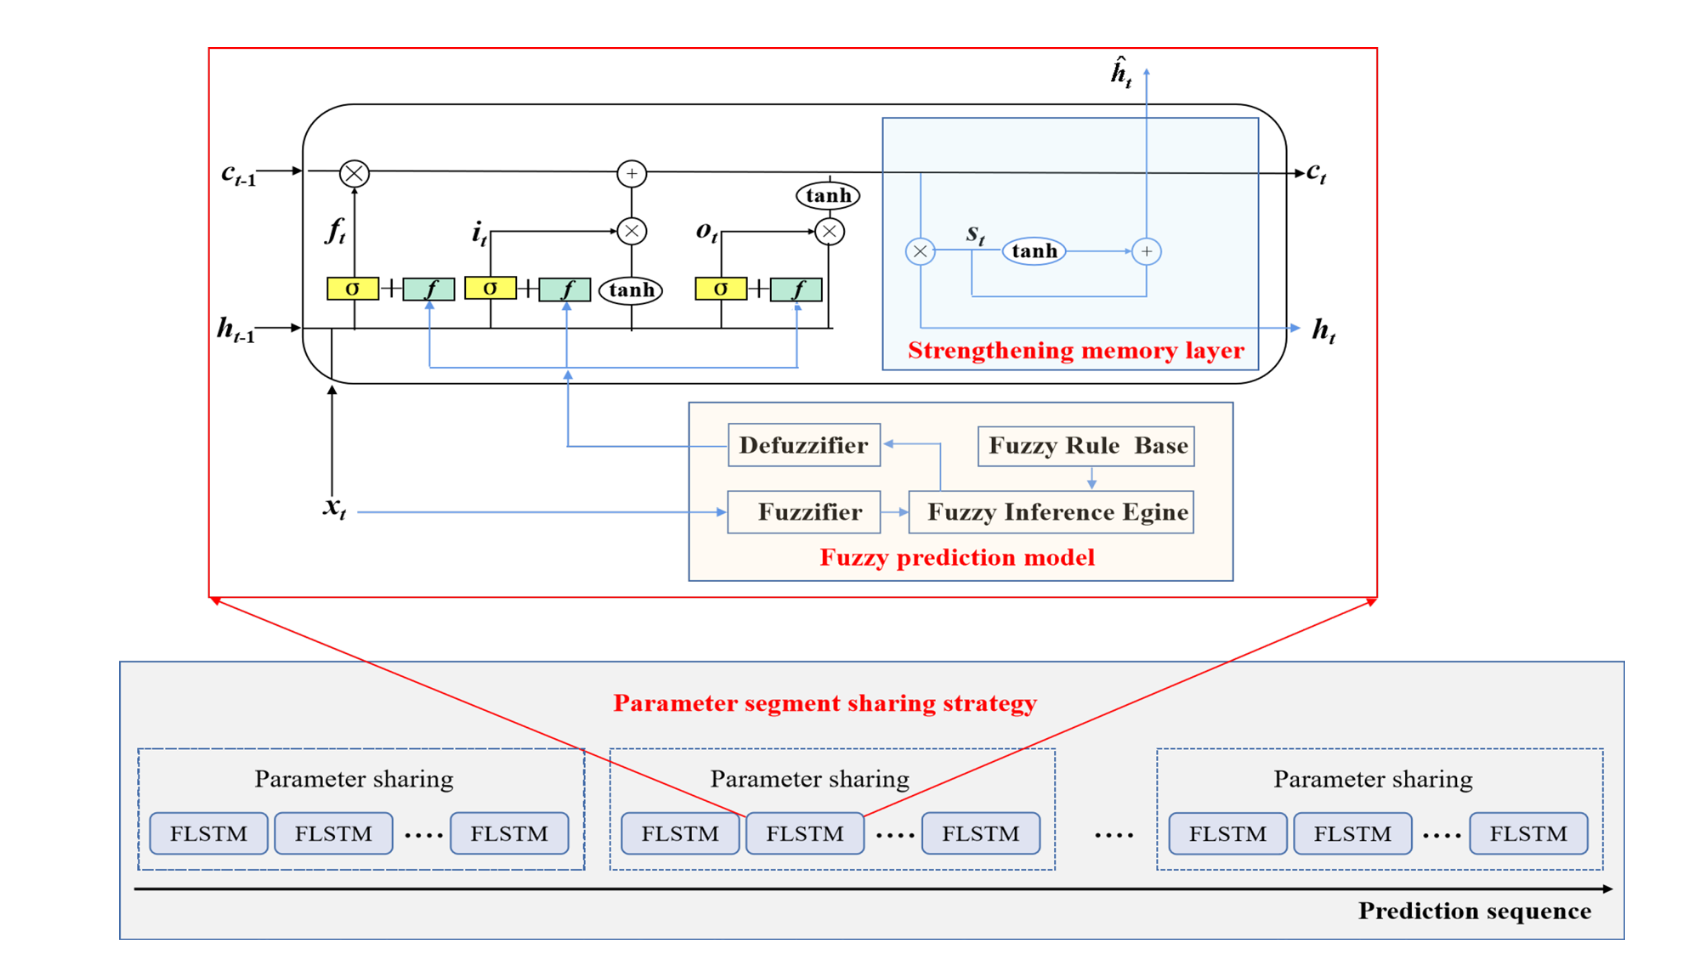

We have taken inspiration from: https://www.nature.com/articles/s41598-023-47812-3

This model combines the traditional LSTM network with fuzzy logic elements to enhance prediction performance.

The diagram shows the architecture of an FLSTM (Fuzzy Long Short-Term Memory) model. This model combines the traditional LSTM network with fuzzy logic elements to enhance prediction performance. Here’s a breakdown of the components in the framework:

#### 1. **Core LSTM Cell**
   - The main component is a standard LSTM cell, which processes inputs (\( x_t \)), the hidden state from the previous timestep (\( h_{t-1} \)), and the cell state from the previous timestep (\( c_{t-1} \)).
   - Inside the LSTM, the usual gates (forget gate \( f_t \), input gate \( i_t \), output gate \( o_t \), and a candidate cell state \( \tilde{c_t} \)) are applied to manage information flow and update the cell state and hidden state.
   - The activation functions used are sigmoid (\( \sigma \)) and hyperbolic tangent (\( \tanh \)).
   - the output of the fuzzy prediction model at each timestep (r_t) is incorporated into the forget, input, and output

#### 2. **Strengthening Memory Layer**
   - This layer is an enhancement to the LSTM structure. It processes the cell state \( c_t \) to produce a strengthened memory output \( \hat{h_t} \).
   - This output seems to undergo additional processing with a separate memory state \( s_t \), which is passed through a \( \tanh \) activation and combined with \( c_t \). This layer likely aims to reinforce the LSTM's memory capacity for certain types of information, making it more robust.

The FLSTM model combines the traditional LSTM’s sequential data modeling capability with fuzzy logic to handle uncertainty and enhance memory. The parameter sharing strategy further optimizes the model for efficient sequential processing. This architecture is likely designed for tasks requiring both time-series prediction and interpretability, such as financial forecasting or other predictive modeling tasks with inherent uncertainty.

In [151]:
# Data prep for training and testing on NVDA
train_size= math.ceil(len(filtered_stock_df_nvda) * 0.7)
test_size_nvda = len(dataset_nvda.data) - train_size
X_train, X_test = dataset_nvda.data[0:train_size, :], dataset_nvda.data[train_size:len(dataset_nvda.data), :]
Y_train, Y_test = dataset_nvda.labels[0:train_size], dataset_nvda.labels[train_size:len(dataset_nvda.labels)]
y_future_test = np.array(dataset_nvda.y_future[train_size:])
y_current_test = np.array(dataset_nvda.y_current[train_size:])

In [152]:
# the output of the fuzzy prediction model at each timestep
r_t_nvda = nf.poppredict(dataset_nvda.data.detach().numpy(), significant_threshold=1)

In [153]:
# Splitting the output into test and train
r_t_train_nvda, r_t_test_nvda = r_t_nvda[0:train_size], r_t_nvda[train_size:len(r_t_nvda)]

In [119]:
# Defined parameters for FLSTM training
input_size = 4  # Size of each input vector
hidden_size = 20  # Size of FLSTM hidden state
output_size = 1   # Size of each output vector
num_layers=2 # number of flstm layers

In [ ]:

class FLSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, popfnn):
        super(FLSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.popfnn = popfnn  # instance of fuzzy logic class

        # LSTM components with additional weights for fuzzy output rt
        self.forget_gate = nn.Linear(input_size + hidden_size, hidden_size)
        self.input_gate = nn.Linear(input_size + hidden_size, hidden_size)
        self.output_gate = nn.Linear(input_size + hidden_size, hidden_size)
        self.cell_gate = nn.Linear(input_size + hidden_size, hidden_size)

        # Additional weights for fuzzy prediction model output (rt)
        self.Wff = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.Wif = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.Wof = nn.Parameter(torch.Tensor(hidden_size, hidden_size))

        # Strengthening memory layer
        self.strengthening_layer = nn.Linear(hidden_size, hidden_size)

        # Initialize weights
        nn.init.kaiming_uniform_(self.Wff, a=math.sqrt(5))
        nn.init.kaiming_uniform_(self.Wif, a=math.sqrt(5))
        nn.init.kaiming_uniform_(self.Wof, a=math.sqrt(5))

    def forward(self, x_t, h_prev, c_prev, r_t):
        # Apply fuzzy inference using popfnn to get fuzzy output rt
        # Concatenate input, previous hidden state, and apply additional weights to r_t

        combined = torch.cat((x_t.squeeze(-1), h_prev), dim=1)

        # LSTM gates with fuzzy influence (r_t)
        f_t = torch.sigmoid(self.forget_gate(combined) + torch.matmul(r_t, self.Wff))
        i_t = torch.sigmoid(self.input_gate(combined) + torch.matmul(r_t, self.Wif))
        o_t = torch.sigmoid(self.output_gate(combined) + torch.matmul(r_t, self.Wof))

        # Candidate cell state
        c_tilde = torch.tanh(self.cell_gate(combined))

        # Update cell state and hidden state
        c_t = f_t * c_prev + i_t * c_tilde
        h_t = o_t * torch.tanh(c_t)

        # Strengthening memory layer (additional memory enhancement)
        s_t = torch.tanh(self.strengthening_layer(c_t))
        h_strong = h_t + s_t  # combining the memory strengthened output

        return h_strong, c_t, r_t

class FLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, popfnn, num_layers=1):
        super(FLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.popfnn = popfnn

        # Define multiple FLSTM cells
        self.cells = nn.ModuleList([FLSTMCell(input_size, hidden_size, popfnn) for _ in range(num_layers)])

        # Output layer for predictions
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x, r_t):
        batch_size, seq_len, _ = x.size()

        # Initialize hidden and cell states
        h = torch.zeros(batch_size, self.hidden_size).to(x.device)
        c = torch.zeros(batch_size, self.hidden_size).to(x.device)

        # Loop through sequence
        for t in range(seq_len):
            x_t = x
            for cell in self.cells:
                h, c, r_t = cell(x_t, h, c, r_t)  # r_t is the fuzzy-enhanced output

            x_t = r_t

        # Final output prediction
        out = self.output_layer(h)
        return out


flstm_model = FLSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size, popfnn=nf, num_layers=num_layers)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)
loss_module = nn.MSELoss()
flstm_model.to(device)
optimizer = torch.optim.Adam(flstm_model.parameters(), lr=0.0001)
num_epochs = 100

In [123]:
flstm_model.train()

r_t_tensor = torch.tensor(r_t_train_nvda).float()
r_t_tensor = r_t_tensor.unsqueeze(1)
r_t_train_nvda_tensor = r_t_tensor.repeat(1, hidden_size)

for epoch in range(num_epochs):

    y_train_pred = flstm_model(X_train_nvda, r_t_train_nvda_tensor)
    train_loss = loss_module(y_train_pred, Y_train_nvda)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {math.sqrt(train_loss.item()):.6f}')
      # print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {math.sqrt(train_loss.item()):.6f}, Validation Loss: {math.sqrt(val_loss.item()):.6f}')

Device cpu
Epoch [10/100], Train Loss: 1.199025
Epoch [20/100], Train Loss: 1.196173
Epoch [30/100], Train Loss: 1.193711
Epoch [40/100], Train Loss: 1.191615
Epoch [50/100], Train Loss: 1.189866
Epoch [60/100], Train Loss: 1.188449
Epoch [70/100], Train Loss: 1.187349
Epoch [80/100], Train Loss: 1.186544
Epoch [90/100], Train Loss: 1.185997
Epoch [100/100], Train Loss: 1.185655


## FLSTM Evaluation on NVDA

In [154]:
r_t_tensor = torch.tensor(r_t_test_nvda).float()
r_t_tensor = r_t_tensor.unsqueeze(1)
r_t_test_nvda_tensor = r_t_tensor.repeat(1, hidden_size)

This portion of the code is intended for consistency. The models provided are the best performing models. Instead you will be provided with file:

* NVDA_flstm_model.tar

Which contain the actual models used in the testing of dataset 2. Uncomment the below code if using the above model

In [155]:
# state_dict_2 = torch.load("/content/NVDA_flstm_model.tar")
# flstm_model = FLSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size, popfnn=nf, num_layers=num_layers)
# flstm_model.load_state_dict(state_dict_2, strict=False)

<All keys matched successfully>

In [156]:
# Evaluate the perfomance on the test dataset of NVIDIA
flstm_model.eval()
with torch.no_grad():
    y_pred_diff = flstm_model(X_test_nvda, r_t_test_nvda_tensor).squeeze().numpy()  # Predict differences on nvidia data

# Add price differences to the current prices to get predicted prices
y_pred_diff = y_pred_diff.reshape(1,-1)
y_pred_price_f = y_current_test_nvda + y_pred_diff

# Calculate the RMSE between the actual price and the pred price from FLSTM
rmse = sqrt(mean_squared_error(y_future_test_nvda, y_pred_price_f.reshape(-1,1)))
rmse

3.9188436963357756

In [ ]:
state_dict = flstm_model.state_dict()
torch.save(state_dict, "NVDA_flstm_model.tar")

In [157]:
df_nvda_hybrid = df_nvda[-test_size_nvda:].copy(deep=True)

In [158]:
# Replace the close prices with predicted close prices
df_nvda_hybrid['Close'] = y_pred_price_f.tolist()[0]

<Axes: xlabel='Date'>

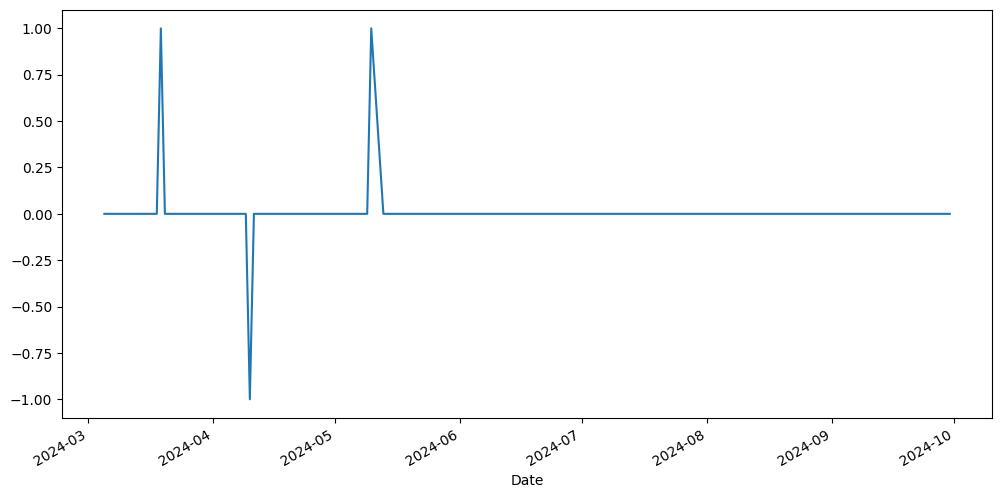

In [159]:
df_nvda_hybrid = calculate_SMA(df=df_nvda_hybrid, short_window_size=10, long_window_size=200) # calculate slow and fast moving sma
df_nvda_hybrid = create_signal_and_position(df_nvda_hybrid) # calculate signal and position
plt.figure(figsize=(12, 6))
df_nvda_hybrid['Position'].plot()

<Axes: xlabel='Date'>

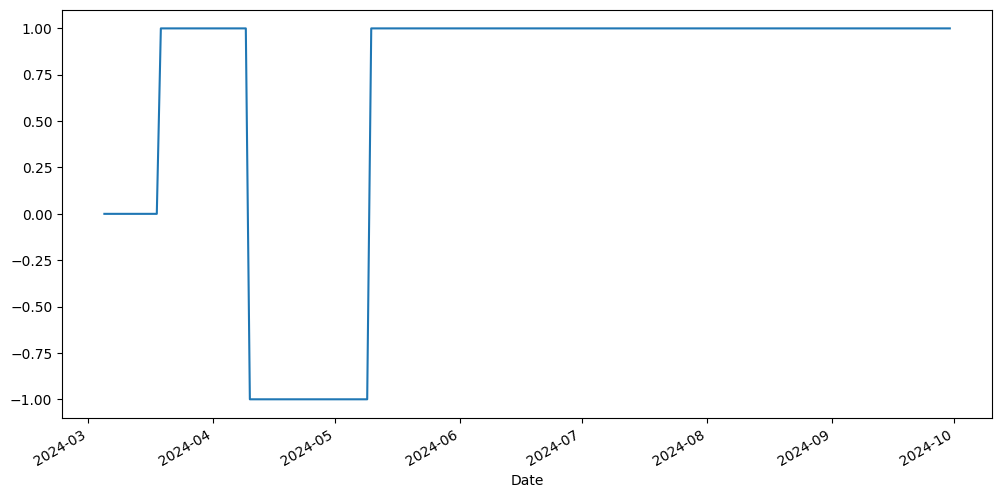

In [160]:
plt.figure(figsize=(12, 6))
df_nvda_hybrid = find_trade(df_nvda_hybrid)
df_nvda_hybrid['Trade'].plot()

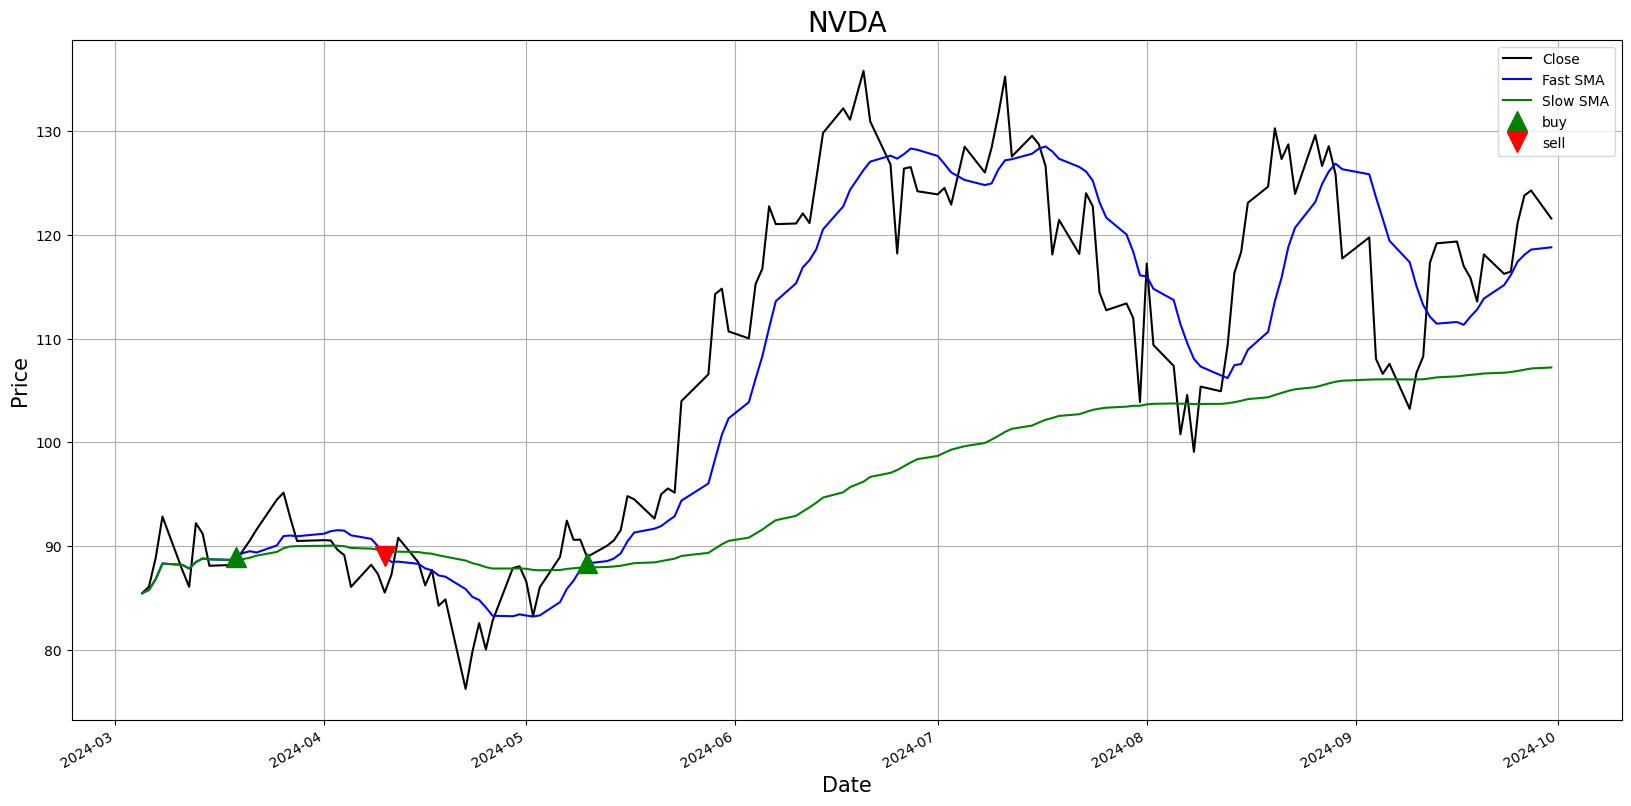

In [161]:
plotprice(df=df_nvda_hybrid, stock_name="NVDA")

<Axes: xlabel='Date'>

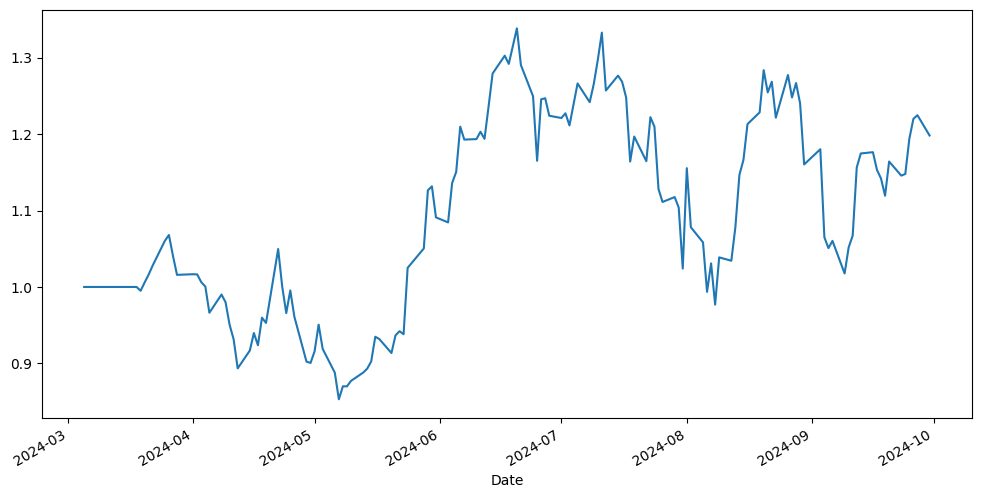

In [162]:
plt.figure(figsize=(12, 6))
df_nvda_hybrid = computereturns(df_nvda_hybrid,0.005)
df_nvda_hybrid['Returns'].plot()

In [163]:
df_nvda_hybrid['Returns'].iloc[-1]

portfolio_return = df_nvda_hybrid['Returns'].iloc[-1]
if portfolio_return >=1:
  print("Final Portfolio Return on Dataset 2 Testing Data: ", portfolio_return, "\nHence, profit.")
else:
  print("Final Portfolio Return on Dataset 2 Testing Data: ", portfolio_return, "\nHence, loss.")

Final Portfolio Return on Dataset 2 Testing Data:  1.1983057122613543 
Hence, profit.


# Transfer Learning on NVDA using Fuzzy LSTM



Transfer learning is a machine learning technique where a model developed for one task is reused (partially or fully) as the starting point for a different but related task. Instead of training a model from scratch, transfer learning leverages the knowledge gained from a pre-trained model to improve learning efficiency on the new task.

#### **Advantages of Transfer Learning**

1. Reduces training time by starting with a pre-trained model.  
2. Improves performance on small datasets.  
3. Addresses data scarcity issues.  
4. Saves computational resources.  
5. Reuses learned features across related tasks.  
6. Speeds up prototyping of machine learning solutions.  
7. Enhances generalization on target tasks.  

This portion of the notebook is intended for consistency. Even with setting the seed, training behavior varies wildly between runtimes and devices. The below training loops are best not to be run again for evaluation. Instead you will be provided with file:

* ADSK_flstm_model.tar
* NVDA_flstm_transfer_model.tar

Which contain the actual models used in the testing of dataset 2

## Train on ADSK dataset first

In [ ]:
# Prepare the data
close_prices = df['Close'].values.reshape(-1, 1)

train_dataset = TimeSeriesTrainDataPrep(close_prices)

In [ ]:
# Data prep for training and testing on ADSK
X_train_adsk = train_dataset.data
Y_train_adsk= train_dataset.labels

In [ ]:

x_trainn_adsk = X_train_adsk.detach().numpy().squeeze(-1)
y_trainn_adsk = Y_train_adsk.detach().numpy()

inmf_adsk = LVQ_learnmem(x_trainn_adsk, [5, True])
outmf_adsk = span_learnmem(y_trainn_adsk, [5, 0.5])
nf_adsk=popfnn(In_mf=inmf_adsk, Out_mf=outmf_adsk, rule_label_dict=rule_label_dict)

for k in range(len(x_trainn_adsk)):
    nf_adsk.poplearn(x_trainn_adsk[k],y_trainn_adsk[k])

nf_adsk.printruleslabels()
nf_adsk.identify_rules()

nf_adsk.print_int_labels()

>epoch=0, lrate=0.300, error=3343.763
>epoch=1, lrate=0.270, error=3280.433
>epoch=2, lrate=0.240, error=3265.579
>epoch=3, lrate=0.210, error=3231.498
>epoch=4, lrate=0.180, error=3190.878
>epoch=5, lrate=0.150, error=3155.637
>epoch=6, lrate=0.120, error=3107.163
>epoch=7, lrate=0.090, error=3108.933
>epoch=8, lrate=0.060, error=3078.808
>epoch=9, lrate=0.030, error=3040.565
N_inputs= 4
N_rules= 625
N_output_mf= 5
rule_number, labels, pweights
0 0 0 0 0 0.002355402254747485 0.3920698765643612 3.456487518172897 1.1198058891480003 0.009432608951139558  
1 0 0 0 1 0.00035638656288677336 0.09920523924844825 0.9719402425591781 0.2547611842218699 0.0016064898288979087  
2 0 0 0 2 0.00036402505742264316 0.10427667373544447 1.0660778031551077 0.28682148016022924 0.0018240971593312767  
3 0 0 0 3 0.000393249256320299 0.12034864100498802 1.324664283910534 0.37824727379456685 0.0025421372617104904  
4 0 0 0 4 0.05268409441342105 1.4221775529387661 4.91647053905085 0.9960227895100023 0.010138903

In [ ]:
significance_threshold = 3
significant_rules = nf_adsk.identify_significant_rules(significance_threshold)
significant_rules

[34,
 39,
 44,
 49,
 59,
 64,
 69,
 74,
 84,
 89,
 94,
 159,
 164,
 169,
 184,
 189,
 194,
 209,
 210,
 214,
 215,
 219,
 280,
 285,
 289,
 290,
 294,
 305,
 310,
 314,
 315,
 319,
 330,
 335,
 340,
 360,
 365,
 405,
 410,
 415,
 430,
 435,
 440,
 455,
 460,
 465,
 535,
 540]

In [ ]:
# the output of the fuzzy prediction model at each timestep
r_t_adsk = nf_adsk.poppredict(train_dataset.data.detach().numpy(), significant_threshold=3)

In [ ]:
# Hyper parameters for this model
hidden_size = 20
num_layers = 1
input_size = 4
output_size = 1

In [ ]:
# Define an instance of FLSTM class for ADSK training
torch.manual_seed(42)
flstm_model_adsk = FLSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size, popfnn=nf_adsk, num_layers=num_layers)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)
flstm_model_adsk.to(device)

# Define loss and optimizer
loss_module = nn.MSELoss()
optimizer = torch.optim.Adam(flstm_model_adsk.parameters(), lr=0.0001)
num_epochs = 200

r_t_tensor = torch.tensor(r_t_adsk).float()
r_t_tensor = r_t_tensor.unsqueeze(1)
r_t_train_adsk = r_t_tensor.repeat(1, hidden_size)

# Train the model for defined number of epochs
flstm_model_adsk.train()
for epoch in range(num_epochs):

    y_train_pred = flstm_model_adsk(X_train_adsk, r_t_train_adsk)
    train_loss = loss_module(y_train_pred, Y_train_adsk)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {math.sqrt(train_loss.item()):.6f}')
      # print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {math.sqrt(train_loss.item()):.6f}, Validation Loss: {math.sqrt(val_loss.item()):.6f}')

Device cpu
Epoch [10/200], Train Loss: 4.398551
Epoch [20/200], Train Loss: 4.397437
Epoch [30/200], Train Loss: 4.396503
Epoch [40/200], Train Loss: 4.395731
Epoch [50/200], Train Loss: 4.395100
Epoch [60/200], Train Loss: 4.394586
Epoch [70/200], Train Loss: 4.394170
Epoch [80/200], Train Loss: 4.393833
Epoch [90/200], Train Loss: 4.393561
Epoch [100/200], Train Loss: 4.393341
Epoch [110/200], Train Loss: 4.393163
Epoch [120/200], Train Loss: 4.393018
Epoch [130/200], Train Loss: 4.392901
Epoch [140/200], Train Loss: 4.392804
Epoch [150/200], Train Loss: 4.392725
Epoch [160/200], Train Loss: 4.392659
Epoch [170/200], Train Loss: 4.392604
Epoch [180/200], Train Loss: 4.392558
Epoch [190/200], Train Loss: 4.392519
Epoch [200/200], Train Loss: 4.392486


In [ ]:
# Save the model trained
state_dict = flstm_model_adsk.state_dict()
torch.save(state_dict, "ADSK_flstm_model.tar")

## Now Define data for NVDA and some of the layers of the above model on NVDA data

In [134]:
# Data Preparation for Transfer Learning on NVDA
train_size= math.ceil(len(filtered_stock_df_nvda) * 0.7)
test_size_nvda = len(dataset_nvda.data) - train_size
X_train, X_test = dataset_nvda.data[0:train_size, :], dataset_nvda.data[train_size:len(dataset_nvda.data), :]
Y_train, Y_test = dataset_nvda.labels[0:train_size], dataset_nvda.labels[train_size:len(dataset_nvda.labels)]
y_future_test = np.array(dataset_nvda.y_future[train_size:len(dataset_nvda.y_future)])
y_current_test = np.array(dataset_nvda.y_current[train_size:len(dataset_nvda.y_current)])

train_data_loader_nvda = DataLoader(TensorDataset(X_train, Y_train), batch_size=32, shuffle=False)
test_data_loader_nvda = DataLoader(TensorDataset(X_test, Y_test), batch_size=32, shuffle=False)

In [174]:
r_t_nvda_train = r_t_nvda[:train_size]
r_t_nvda_test = r_t_nvda[train_size:]

r_t_nvda_train_tensor = torch.tensor(r_t_nvda_train).float()
r_t_nvda_train_tensor = r_t_nvda_train_tensor.unsqueeze(1)
r_t_nvda_train_tensor = r_t_nvda_train_tensor.repeat(1, 20)

r_t_nvda_test_tensor = torch.tensor(r_t_nvda_test).float()
r_t_nvda_test_tensor = r_t_nvda_test_tensor.unsqueeze(1)
r_t_nvda_test_tensor = r_t_nvda_test_tensor.repeat(1, 20)

In [175]:
r_t_nvda_train_tensor_loader = DataLoader(r_t_nvda_train_tensor, batch_size=1, shuffle=False)

In [176]:
r_t_nvda_test_tensor_loader = DataLoader(r_t_nvda_test_tensor, batch_size=1, shuffle=False)

In [177]:
y_current_test = dataset_nvda.y_current[train_size:len(dataset_nvda.y_current)]

In [ ]:
# Load FLSTM model created above
state_dict = torch.load("ADSK_flstm_model.tar")
new_model = FLSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size, popfnn=nf, num_layers=1)
new_model.load_state_dict(state_dict)

torch.manual_seed(42)

# add new output layer to the structure which will be trained upon NVDA data
new_model.output_layer = nn.Sequential(
    nn.Linear(new_model.output_layer.in_features, 1)
)
new_model.to(device)


# Freeze most of the model's layers, but allow the last few layers and output layer to be trained
for name, param in new_model.named_parameters():
    if "output_layer" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define a loss function and optimizer with learning rate for trainable layers
loss_module = nn.MSELoss()
optimizer_nvda = optim.Adam(
    [
        {"params": new_model.output_layer.parameters(), "lr": 0.0001}
    ]
)

# Add a learning rate scheduler to adjust the learning rate over time
scheduler = optim.lr_scheduler.StepLR(optimizer_nvda, step_size=20, gamma=0.5)

# Define the training function with additional metrics
predictions = []
def train_model_nvda(model, data_loader, optimizer, loss_module, r_t_loader, scheduler, test_data_loader, r_t_test_loader,num_epochs=50):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_loss_val = 0.0
        print(f'Epoch {epoch+1}/{num_epochs}')

        for batch_idx, ((data_input, data_labels), r_t_data) in enumerate(zip(data_loader, r_t_loader)):
            data_input, data_labels = data_input.to(device), data_labels.to(device)
            r_t_data = r_t_data.to(device)

            # Forward pass with fuzzy output
            preds = model(data_input, r_t_data)
            preds = preds.squeeze(dim=1)

            # Compute loss
            loss = loss_module(preds, data_labels.float())
            running_loss += loss.item()

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Step the scheduler after each epoch
        scheduler.step()

        # Log the loss after each epoch
        print(f'Loss: {running_loss / len(data_loader):.4f}')
    print("Training complete.")


In [ ]:

torch.manual_seed(42)

# Train the model with new data loader and adjusted settings
train_model_nvda(new_model, train_data_loader_nvda, optimizer_nvda, loss_module, r_t_nvda_train_tensor_loader, scheduler, test_data_loader_nvda, r_t_nvda_test_tensor_loader, num_epochs=100)


# Evaluate the model on the test data for NVDA
def evaluate_model_nvda(model, test_data_loader, r_t_test_loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for batch_idx, ((data_input, data_labels), r_t_test_data) in enumerate(zip(test_data_loader, r_t_test_loader)):
            data_input, data_labels = data_input.to(device), data_labels.to(device)
            r_t_test_data = r_t_test_data.to(device)
            preds = model(data_input, r_t_test_data)
            predictions.extend(preds.cpu().numpy())
    return predictions

# Run evaluation
nvda_predictions = evaluate_model_nvda(new_model, test_data_loader_nvda, r_t_nvda_test_tensor_loader)

Epoch 1/100
Loss: 1.6995
Epoch 2/100
Loss: 1.6955
Epoch 3/100
Loss: 1.6916
Epoch 4/100
Loss: 1.6878
Epoch 5/100
Loss: 1.6841
Epoch 6/100
Loss: 1.6804
Epoch 7/100
Loss: 1.6768
Epoch 8/100
Loss: 1.6732
Epoch 9/100
Loss: 1.6697
Epoch 10/100
Loss: 1.6662
Epoch 11/100
Loss: 1.6627
Epoch 12/100
Loss: 1.6593
Epoch 13/100
Loss: 1.6560
Epoch 14/100
Loss: 1.6527
Epoch 15/100
Loss: 1.6494
Epoch 16/100
Loss: 1.6461
Epoch 17/100
Loss: 1.6430
Epoch 18/100
Loss: 1.6398
Epoch 19/100
Loss: 1.6367
Epoch 20/100
Loss: 1.6336
Epoch 21/100
Loss: 1.6313
Epoch 22/100
Loss: 1.6298
Epoch 23/100
Loss: 1.6283
Epoch 24/100
Loss: 1.6268
Epoch 25/100
Loss: 1.6253
Epoch 26/100
Loss: 1.6239
Epoch 27/100
Loss: 1.6224
Epoch 28/100
Loss: 1.6209
Epoch 29/100
Loss: 1.6195
Epoch 30/100
Loss: 1.6180
Epoch 31/100
Loss: 1.6166
Epoch 32/100
Loss: 1.6152
Epoch 33/100
Loss: 1.6137
Epoch 34/100
Loss: 1.6123
Epoch 35/100
Loss: 1.6109
Epoch 36/100
Loss: 1.6095
Epoch 37/100
Loss: 1.6081
Epoch 38/100
Loss: 1.6067
Epoch 39/100
Loss: 1.

In [ ]:
state_dict = new_model.state_dict()
torch.save(state_dict, "NVDA_flstm_transfer_model.tar")

Uncomment the below code to load the transfer learning model

In [178]:
# state_dict_2 = torch.load("/content/NVDA_flstm_transfer_model.tar")

# # Create a new state dictionary with the expected keys
# new_state_dict = {}
# for k, v in state_dict_2.items():
#     if k.startswith("output_layer.0."):
#         new_k = k.replace("output_layer.0.", "output_layer.")  # Rename the keys
#         new_state_dict[new_k] = v
#     else:
#         new_state_dict[k] = v

# new_model_3 = FLSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size, popfnn=nf, num_layers=1)
# new_model_3.load_state_dict(new_state_dict, strict=False)

# def evaluate_model_nvda(model, test_data_loader, r_t_test_loader):
#     model.eval()
#     predictions = []
#     with torch.no_grad():
#         for batch_idx, ((data_input, data_labels), r_t_test_data) in enumerate(zip(test_data_loader, r_t_test_loader)):
#             data_input, data_labels = data_input.to(device), data_labels.to(device)
#             r_t_test_data = r_t_test_data.to(device)
#             preds = model(data_input, r_t_test_data)
#             predictions.extend(preds.cpu().numpy())
#     return predictions


# nvda_predictions = evaluate_model_nvda(new_model_3, test_data_loader_nvda, r_t_nvda_test_tensor_loader)

## Model Evaluation

In [179]:
# Add price differences to the current prices
predictions = np.array(nvda_predictions)
predictions = predictions.reshape(-1)
y_predicted_future = predictions + y_current_test

In [180]:
# Calculate RMSE between predicted future prices from transfer learning model and y_future test set
rmse = sqrt(mean_squared_error(y_predicted_future, y_future_test))
rmse

3.888635203364928

Here, the RMSE is the lowest as compared to direct evaluation of FLSTM and benchmark model evalutuon over NVDA dataset.

In [181]:
# Make a copy of dataframe
df_nvda_hybrid_transfer_learning = df_nvda[-test_size_nvda:].copy(deep=True)

In [182]:
# Replace the close prices with predicted close prices
df_nvda_hybrid_transfer_learning['Close'] = y_predicted_future

## Portfolio Returns using Transfer learning model

In [183]:
# Calculate FSMA, SSMA, Signal, Position, Trade and Multiplicative Returns
df_nvda_hybrid_transfer_learning = calculate_SMA(df=df_nvda_hybrid_transfer_learning, short_window_size=10, long_window_size=200)
df_nvda_hybrid_transfer_learning = create_signal_and_position(df_nvda_hybrid_transfer_learning)
df_nvda_hybrid_transfer_learning = find_trade(df_nvda_hybrid_transfer_learning)
df_nvda_hybrid_transfer_learning = computereturns(df_nvda_hybrid_transfer_learning,0.005)


<Axes: xlabel='Date'>

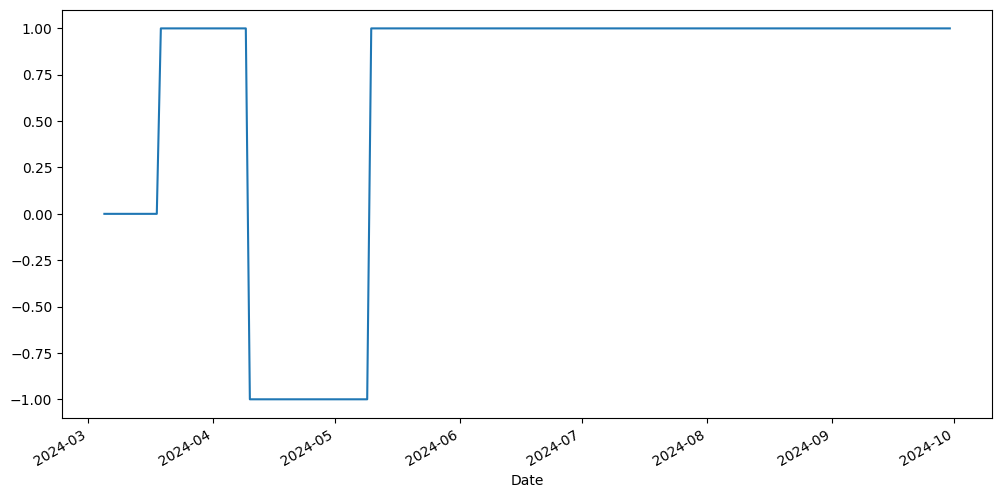

In [184]:
plt.figure(figsize=(12, 6))
df_nvda_hybrid_transfer_learning['Trade'].plot()

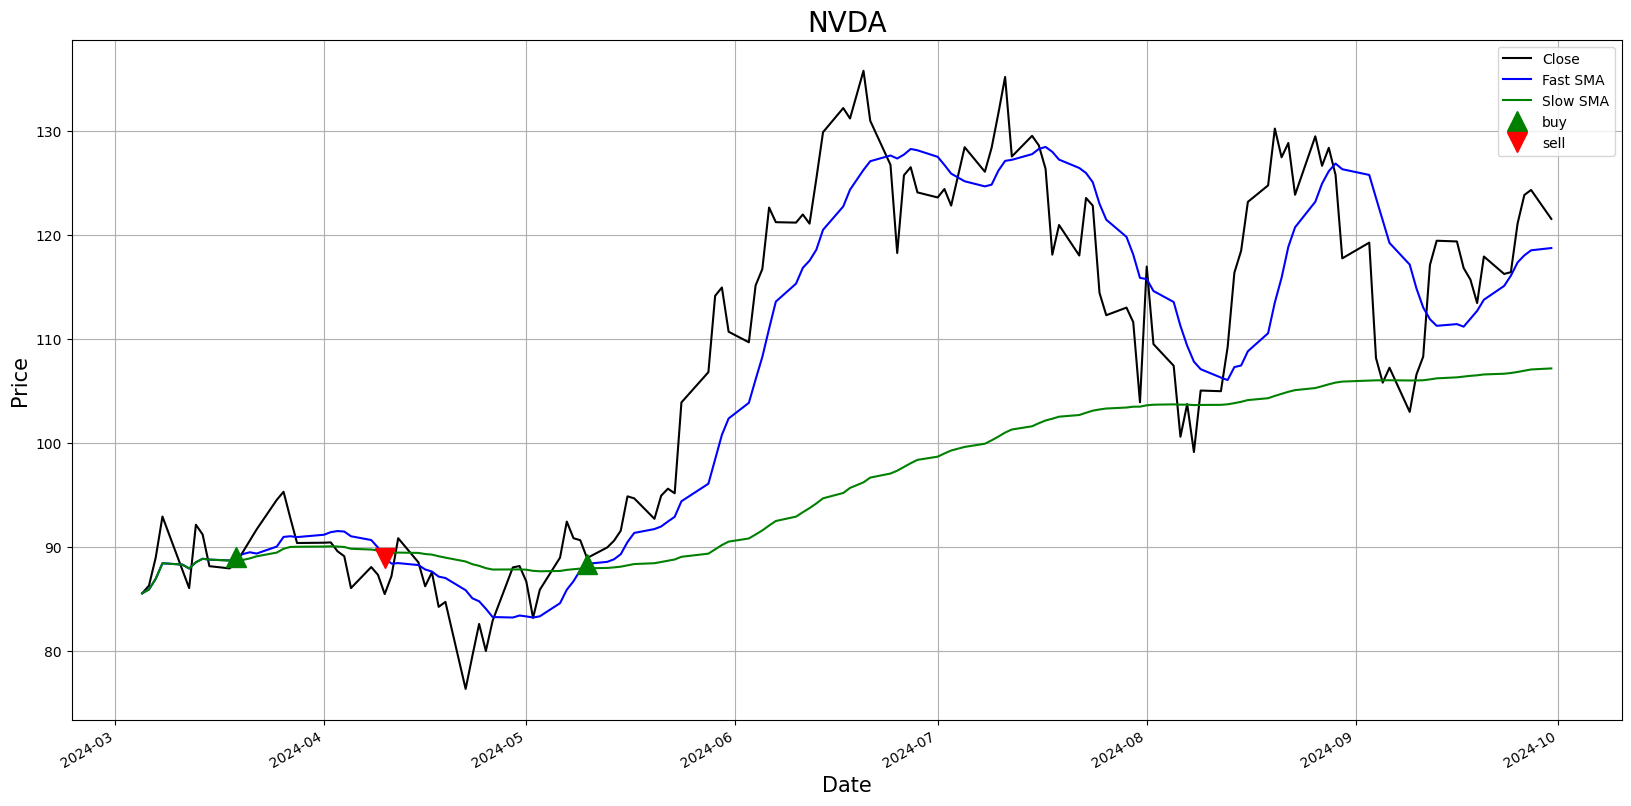

In [185]:
plotprice(df=df_nvda_hybrid_transfer_learning, stock_name="NVDA")

<Axes: xlabel='Date'>

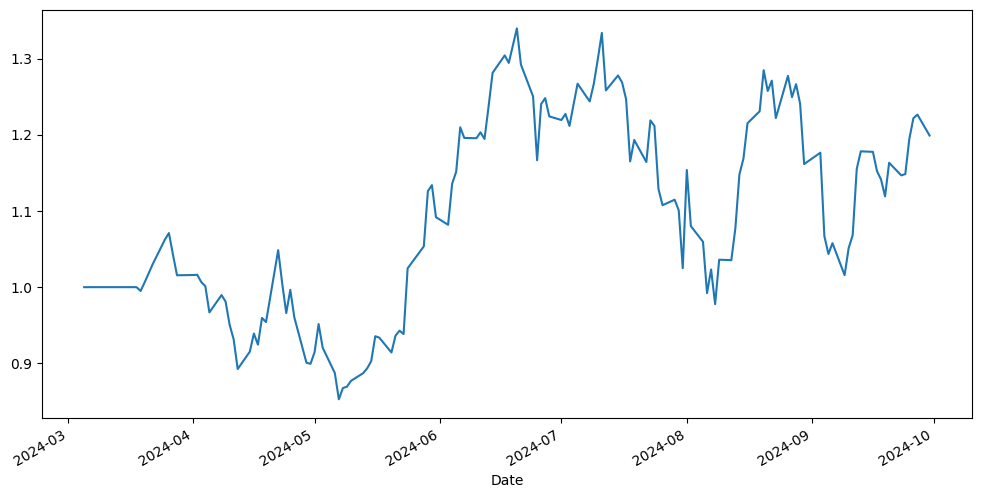

In [186]:

plt.figure(figsize=(12, 6))
df_nvda_hybrid_transfer_learning['Returns'].plot()

In [187]:
# Get the last value of returns to see profit/loss
df_nvda_hybrid_transfer_learning['Returns'].iloc[-1]

portfolio_return = df_nvda_hybrid_transfer_learning['Returns'].iloc[-1]
if portfolio_return >=1:
  print("Final Portfolio Return on Dataset 2 Testing Data: ", portfolio_return, "\nHence, profit.")
else:
  print("Final Portfolio Return on Dataset 2 Testing Data: ", portfolio_return, "\nHence, loss.")

Final Portfolio Return on Dataset 2 Testing Data:  1.198971017725214 
Hence, profit.


Since the Returns are greater than 1 and higher than the FLSTM model being tested directly on NVDA, this transfer learning model turns out to be better at predicting prices and returns

# Results Comparison on NVIDIA Dataset

#### Comparison for Models on NVDA set
Models | RMSE | Returns
-------------------|--------------------|-----------------
Random Walk | 7.500248068451879 | 1.014745641251684
Benchmark LSTM | 4.711770090475661 | 1.184342832469406
FLSTM | 3.9188434895649857 | 1.1983057471441645
FLSTM Transfer Learning Model| 3.8886349574944163 | 1.1989710255070456

### Results Explanation:

1. **Random Walk Model**
   - **RMSE:** 7.5002  
   - **Returns:** 1.0147  
   - The Random Walk model has the highest RMSE (7.5002), indicating poor prediction accuracy compared to the other models. The Returns are 1.0147, the lowest among all models, showing that this model is ineffective in generating profits. This suggests that the Random Walk model is unsuitable for financial forecasting or profit-driven tasks.

2. **Benchmark LSTM**
   - **RMSE:** 4.6016  
   - **Returns:** 1.1843  
   - The Benchmark LSTM model significantly reduces the RMSE to 4.6016, showing better prediction accuracy compared to the Random Walk model. The Returns of 1.1843 reflect a substantial improvement in profitability, demonstrating the effectiveness of LSTM for financial forecasting tasks.

3. **FLSTM Model**
   - **RMSE:** 3.9188  
   - **Returns:** 1.1983  
   - The FLSTM model further improves prediction accuracy, achieving an RMSE of 3.9188, which is lower than the Benchmark LSTM model. The Returns increase to 1.1983, highlighting its enhanced ability to generate profits. This indicates that the FLSTM model is better optimized for financial forecasting compared to the Benchmark LSTM.

4. **FLSTM Transfer Learning Model**
   - **RMSE:** 3.8886  
   - **Returns:** 1.1989  
   - The FLSTM Transfer Learning model achieves the lowest RMSE (3.8886), demonstrating the best prediction accuracy among all models. It also has the highest Returns (1.1989), making it the most effective model for profitability. Incorporating transfer learning improves both predictive accuracy and profit generation, highlighting its value in financial forecasting applications.

---

### Key Observations:

1. **Prediction Accuracy (RMSE):**
   - The Random Walk model has the highest RMSE, indicating poor predictive performance.  
   - LSTM-based models progressively improve RMSE, with the FLSTM Transfer Learning model achieving the best accuracy (3.8886).

2. **Profitability (Returns):**
   - Returns reflect the financial effectiveness of the models. The Random Walk model generates the lowest Returns (1.0147).  
   - LSTM-based models perform significantly better, with the FLSTM Transfer Learning model achieving the highest Returns (1.1989), indicating its superior ability to maximize profits.

---

### Conclusion:
The LSTM-based models, especially the FLSTM Transfer Learning model, outperform the Random Walk model in both prediction accuracy and profitability. This highlights the importance of advanced architectures like transfer learning for financial forecasting and decision-making.

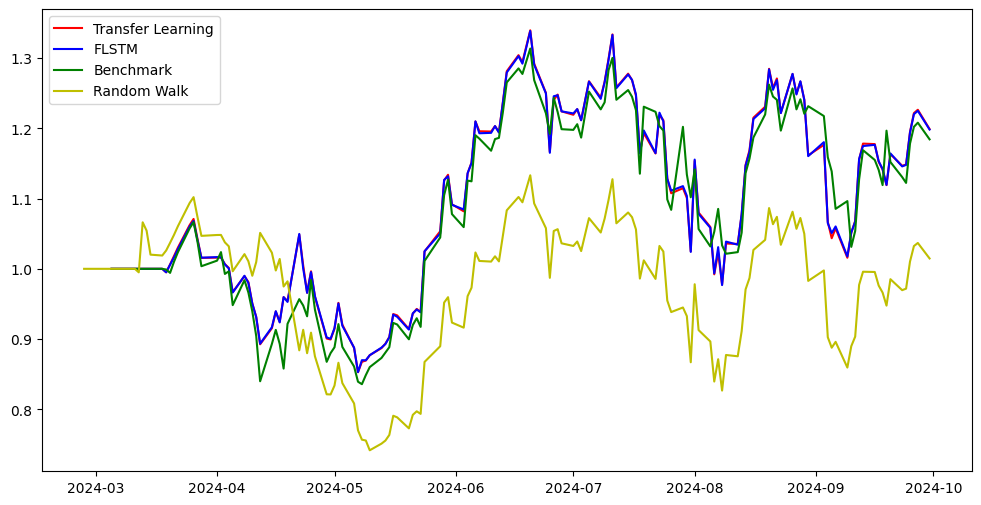

In [198]:
plt.figure(figsize=(12, 6))
plt.plot(df_nvda_hybrid_transfer_learning['Returns'], color='r')
plt.plot(df_nvda_hybrid['Returns'], color='b')
plt.plot(df_nvda_benchmark['Returns'], color='g')
plt.plot(df_RW_copy['Returns'], color='y')
plt.legend(['Transfer Learning', 'FLSTM', 'Benchmark', 'Random Walk'])